# <font color=blue>Telecom Churn Case Study - Predict "Churn" of High-valued customers</font>

In [1]:
# Import all libraries for Data Analysis, Visualisation, Random Forest & Logisic Regression

# Library for Dataset analysis
import pandas as pd
import numpy as np

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

# Libraries for Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For Spliting data into traning and test data sets
from sklearn.model_selection import train_test_split

# For Standardisation and Scaling
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# To build logistic regression model
import statsmodels.api as sm

# Import RFE used in feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Check VIF value of the variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For compute accuracy scores & Confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc 

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
                        
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Import PCA module
from sklearn.decomposition import PCA

# import SMOTE module
from imblearn.over_sampling import SMOTE

# To build logistic regression model
import statsmodels.api as sm

# Import RFE for feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [2]:
#Set option to display maximum 100 columns and 500 rows
pd.set_option('display.max_columns', 500)
pd.set_option("display.max_rows", 500)

## <font color=blue>Part 1A : Data Analysis - Analyse and Visualize features in Train and Test Data Set</font>

In [3]:
# Read data from the Train.CSV and Test.csv files into a DataFrame
telcom_trainCSV_df = pd.read_csv("train.csv")
telcom_testCSV_df = pd.read_csv("test.csv")

In [4]:
#Get the shape for train.csv and test.csv (row and column count of the data)
print("Train data shape:",telcom_trainCSV_df.shape)
print("Test data shape:",telcom_testCSV_df.shape)

Train data shape: (69999, 172)
Test data shape: (30000, 171)


In [5]:
#Get numerical columns description for Train.csv
telcom_trainCSV_df.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

In [6]:
#Get numerical columns description for Test.csv
telcom_testCSV_df.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  30000.000000    30000.0         29684.0         29684.0   
mean   84998.500000      109.0             0.0             0.0   
std     8660.398374        0.0             0.0             0.0   
min    69999.000000      109.0             0.0             0.0   
25%    77498.750000      109.0             0.0             0.0   
50%    84998.500000      109.0             0.0             0.0   
75%    92498.250000      109.0             0.0             0.0   
max    99998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         29684.0  30000.000000  30000.000000  30000.000000  28831.000000   
mean              0.0    282.644348    279.355021    279.845167    130.629693   
std               0.0    314.560212    323.205370    326.437029    290.677420   
min               0.0   -185.043000  -2014.045000   -146.859000      0.000000   
25%               0.0     92.907500     87.504750     84.180500      7.280000   
50%               0.0    198.227500    191.775000    191.690500     34.760000   
75%               0.0    371.969250    365.250750    367.804750    117.170000   
max               0.0  10955.066000  13224.119000  13505.996000   6944.360000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  28828.000000  28325.000000  28831.000000  28828.000000  28325.000000   
mean     133.148632    133.111348    195.745473    196.792375    196.647889   
std      302.921820    301.951806    316.923836    333.628481    334.277643   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.660000      6.540000     34.385000     32.110000     31.740000   
50%       32.550000     33.060000     95.830000     91.435000     92.810000   
75%      115.210000    117.730000    229.230000    224.972500    225.760000   
max     7411.010000   6723.790000   6962.460000   9667.130000  13547.840000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   28831.000000   28828.000000   28325.000000   28831.000000   
mean       10.380431       7.465889       7.967267      13.269785   
std        99.973352     103.337675      94.622596      66.475975   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13724.380000   15371.040000   13095.360000    2165.440000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   28828.000000   28325.000000      28831.000000      28828.000000   
mean        9.763957      10.440251         47.557601         47.188688   
std        58.325466      64.933372        150.588656        156.664295   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.650000          1.580000   
50%         0.000000       0.000000         11.930000         11.680000   
75%         0.000000       0.000000         41.410000         40.190000   
max      1878.860000    2860.510000       5878.530000       7163.210000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      28325.000000      28831.000000      28828.000000      28325.000000   
mean          46.359887         93.584273         92.793180         93.238288   
std          145.087354        164.481651        165.674188        164.516683   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.580000          9.770000          9.890000          9.740000   
50%           11.690000         41.010000         41.060000         40.440000   
75%           40.490000        110.330000        107.645000        108.680000   
max         6723.790000       4729

In [7]:
#Get the columns wise info on Datatypes & missing values for Train.csv
telcom_trainCSV_df.info(verbose = True, null_counts = True) 
telcom_trainCSV_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

In [8]:
#Get the columns wise info on Datatypes & missing values for Test.csv
telcom_testCSV_df.info(verbose = True, null_counts = True) 
telcom_testCSV_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        30000 non-null  int64  
 1    circle_id                 30000 non-null  int64  
 2    loc_og_t2o_mou            29684 non-null  float64
 3    std_og_t2o_mou            29684 non-null  float64
 4    loc_ic_t2o_mou            29684 non-null  float64
 5    last_date_of_month_6      30000 non-null  object 
 6    last_date_of_month_7      29798 non-null  object 
 7    last_date_of_month_8      29633 non-null  object 
 8    arpu_6                    30000 non-null  float64
 9    arpu_7                    30000 non-null  float64
 10   arpu_8                    30000 non-null  float64
 11   onnet_mou_6               28831 non-null  float64
 12   onnet_mou_7               28828 non-null  float64
 13   onnet_mou_8               28325 non-null  fl

In [9]:
#Check sample values using df.head()
telcom_trainCSV_df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [10]:
# Check column wise null percentages for Train.csv.
telcom_trainCSV_null_fields=round((telcom_trainCSV_df.isna().sum())/len(telcom_trainCSV_df.index) * 100,2)
print(telcom_trainCSV_null_fields[telcom_trainCSV_null_fields > 70])

date_of_last_rech_data_6    74.90
date_of_last_rech_data_7    74.48
date_of_last_rech_data_8    73.69
total_rech_data_6           74.90
total_rech_data_7           74.48
total_rech_data_8           73.69
max_rech_data_6             74.90
max_rech_data_7             74.48
max_rech_data_8             73.69
count_rech_2g_6             74.90
count_rech_2g_7             74.48
count_rech_2g_8             73.69
count_rech_3g_6             74.90
count_rech_3g_7             74.48
count_rech_3g_8             73.69
av_rech_amt_data_6          74.90
av_rech_amt_data_7          74.48
av_rech_amt_data_8          73.69
arpu_3g_6                   74.90
arpu_3g_7                   74.48
arpu_3g_8                   73.69
arpu_2g_6                   74.90
arpu_2g_7                   74.48
arpu_2g_8                   73.69
night_pck_user_6            74.90
night_pck_user_7            74.48
night_pck_user_8            73.69
fb_user_6                   74.90
fb_user_7                   74.48
fb_user_8     

In [11]:
# Check column wise null percentages for Test.csv.
telcom_testCSV_null_fields=round((telcom_testCSV_df.isna().sum())/len(telcom_testCSV_df.index) * 100,2)
print(telcom_testCSV_null_fields[telcom_testCSV_null_fields > 70])

date_of_last_rech_data_6    74.72
date_of_last_rech_data_7    74.31
date_of_last_rech_data_8    73.59
total_rech_data_6           74.72
total_rech_data_7           74.31
total_rech_data_8           73.59
max_rech_data_6             74.72
max_rech_data_7             74.31
max_rech_data_8             73.59
count_rech_2g_6             74.72
count_rech_2g_7             74.31
count_rech_2g_8             73.59
count_rech_3g_6             74.72
count_rech_3g_7             74.31
count_rech_3g_8             73.59
av_rech_amt_data_6          74.72
av_rech_amt_data_7          74.31
av_rech_amt_data_8          73.59
arpu_3g_6                   74.72
arpu_3g_7                   74.31
arpu_3g_8                   73.59
arpu_2g_6                   74.72
arpu_2g_7                   74.31
arpu_2g_8                   73.59
night_pck_user_6            74.72
night_pck_user_7            74.31
night_pck_user_8            73.59
fb_user_6                   74.72
fb_user_7                   74.31
fb_user_8     

In [12]:
#Check the sample values for August CHurn indiacators
telcom_trainCSV_df[['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']].head()

total_ic_mou_8  total_og_mou_8  vol_2g_mb_8  vol_3g_mb_8
0           40.56            3.63         0.00          0.0
1           25.04           31.66         0.00          0.0
2           36.64            0.00         0.00          0.0
3           83.84           53.84         0.00          0.0
4           28.31           15.76       213.47          0.0

In [13]:
#Check the count of September Churn customers
telcom_trainCSV_df.loc[(telcom_trainCSV_df['total_ic_mou_8'] == 0.00) & (telcom_trainCSV_df['total_og_mou_7'] == 0.00) & (telcom_trainCSV_df['vol_2g_mb_8'] == 0.00) & (telcom_trainCSV_df['vol_3g_mb_8'] == 0.00)].shape

(2775, 172)

### <font color = blue>We need to identify the high value customers based on the total recharge amount value.</font>

In [14]:
telcom_trainCSV_df['avg_rech_amt_goodph']=(telcom_trainCSV_df['total_rech_amt_6'] + telcom_trainCSV_df['total_rech_amt_7'] )/2
telcom_testCSV_df['avg_rech_amt_goodph']=(telcom_testCSV_df['total_rech_amt_6'] + telcom_testCSV_df['total_rech_amt_7'] )/2

In [15]:
telcom_trainCSV_df[['total_rech_amt_6','total_rech_amt_7','avg_rech_amt_goodph']].head()

total_rech_amt_6  total_rech_amt_7  avg_rech_amt_goodph
0                77                65                 71.0
1                 0               145                 72.5
2                70               120                 95.0
3               160               240                200.0
4               290               136                213.0

In [16]:
telcom_testCSV_df[['total_rech_amt_6','total_rech_amt_7','avg_rech_amt_goodph']].head()

total_rech_amt_6  total_rech_amt_7  avg_rech_amt_goodph
0               103                90                 96.5
1               500               500                500.0
2               500              1000                750.0
3               110               260                185.0
4               356               490                423.0

### <font color = blue>Extract the high volume customers with recharge spends >= 70th percentile.</font>

In [17]:
hvtelcom_trainCSV_df = telcom_trainCSV_df[telcom_trainCSV_df['avg_rech_amt_goodph'] >= telcom_trainCSV_df['avg_rech_amt_goodph'].quantile(0.70)]
hvtelcom_trainCSV_df[['total_rech_amt_6','total_rech_amt_7','avg_rech_amt_goodph']].head(10)

total_rech_amt_6  total_rech_amt_7  avg_rech_amt_goodph
12               521               418                469.5
15               654               400                527.0
23              1420               990               1205.0
24               440               427                433.5
25               330               480                405.0
27               565               572                568.5
39               448               716                582.0
45              1768              2076               1922.0
49               446               776                611.0
51                 0               797                398.5

In [18]:
hvtelcom_testCSV_df = telcom_testCSV_df
hvtelcom_testCSV_df[['total_rech_amt_6','total_rech_amt_7','avg_rech_amt_goodph']].head(10)

total_rech_amt_6  total_rech_amt_7  avg_rech_amt_goodph
0               103                90                 96.5
1               500               500                500.0
2               500              1000                750.0
3               110               260                185.0
4               356               490                423.0
5                69                56                 62.5
6                 0                 0                  0.0
7                60                80                 70.0
8               336               342                339.0
9                 0               356                178.0

In [19]:
hvtelcom_trainCSV_df.shape

(21018, 173)

In [20]:
hvtelcom_testCSV_df.shape

(30000, 172)

In [21]:
#Get the columns wise info - Datatypes and missing values
hvtelcom_trainCSV_df.info(verbose = True, null_counts = True) 
hvtelcom_trainCSV_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21018 entries, 12 to 69996
Data columns (total 173 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        21018 non-null  int64  
 1    circle_id                 21018 non-null  int64  
 2    loc_og_t2o_mou            20943 non-null  float64
 3    std_og_t2o_mou            20943 non-null  float64
 4    loc_ic_t2o_mou            20943 non-null  float64
 5    last_date_of_month_6      21018 non-null  object 
 6    last_date_of_month_7      20998 non-null  object 
 7    last_date_of_month_8      20910 non-null  object 
 8    arpu_6                    21018 non-null  float64
 9    arpu_7                    21018 non-null  float64
 10   arpu_8                    21018 non-null  float64
 11   onnet_mou_6               20795 non-null  float64
 12   onnet_mou_7               20810 non-null  float64
 13   onnet_mou_8               20363 non-null  f

In [22]:
#Check the count of August month predicted churners
hvtelcom_trainCSV_df.loc[(hvtelcom_trainCSV_df['total_ic_mou_8'] == 0.00) & (hvtelcom_trainCSV_df['total_og_mou_8'] == 0.00) & (hvtelcom_trainCSV_df['vol_2g_mb_8'] == 0.00) & (hvtelcom_trainCSV_df['vol_3g_mb_8'] == 0.00)].shape

(1212, 173)

### <font color = blue> Create the new column "churn" and mark the it as 1 for Septmeber churners.</font>

In [23]:
hvtelcom_trainCSV_df.loc[(hvtelcom_trainCSV_df['total_ic_mou_8'] == 0.00) & (hvtelcom_trainCSV_df['total_og_mou_8'] == 0.00) & (hvtelcom_trainCSV_df['vol_2g_mb_8'] == 0.00) & (hvtelcom_trainCSV_df['vol_3g_mb_8'] == 0.00), 'churn'] = 1 
hvtelcom_testCSV_df.loc[(hvtelcom_testCSV_df['total_ic_mou_8'] == 0.00) & (hvtelcom_testCSV_df['total_og_mou_8'] == 0.00) & (hvtelcom_testCSV_df['vol_2g_mb_8'] == 0.00) & (hvtelcom_testCSV_df['vol_3g_mb_8'] == 0.00), 'churn'] = 1 

### <font color = blue> Mark the remaining entries as Non-Churn (churn =0) </font>

In [24]:
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['churn'].isnull(), 'churn'] = 0
hvtelcom_testCSV_df.loc[hvtelcom_testCSV_df['churn'].isnull(), 'churn'] = 0

In [25]:
hvtelcom_trainCSV_df['churn'].value_counts()

0.0    19806
1.0     1212
Name: churn, dtype: int64

In [26]:
hvtelcom_testCSV_df['churn'].value_counts()

0.0    27582
1.0     2418
Name: churn, dtype: int64

In [27]:
hvtelcom_testCSV_df.shape

(30000, 173)

### <font color=blue> Extract all columns ending with *_9 (Septmenber) in train and test data and drop them </font>

In [28]:
churn_month_trainCSV_cols = np.core.defchararray.find(hvtelcom_trainCSV_df.columns.values.astype(str), '_9') >= 0
churn_month_trainCSV_cols

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [29]:
churn_month_testCSV_cols = np.core.defchararray.find(hvtelcom_testCSV_df.columns.values.astype(str), '_9') >= 0
churn_month_testCSV_cols

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [30]:
churn_month_trainCSV_col_list=list(hvtelcom_trainCSV_df.columns[churn_month_trainCSV_cols])

In [31]:
churn_month_testCSV_col_list=list(hvtelcom_testCSV_df.columns[churn_month_testCSV_cols])

In [32]:
hvtelcom_trainCSV_df[churn_month_trainCSV_col_list].head()

Empty DataFrame
Columns: []
Index: [12, 15, 23, 24, 25]

In [33]:
hvtelcom_testCSV_df[churn_month_testCSV_col_list].head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [34]:
hvtelcom_trainCSV_df.drop(churn_month_trainCSV_col_list,axis=1,inplace=True)

In [35]:
hvtelcom_trainCSV_df.shape

(21018, 174)

In [36]:
hvtelcom_testCSV_df.drop(churn_month_testCSV_col_list,axis=1,inplace=True)

In [37]:
hvtelcom_testCSV_df.shape

(30000, 173)

### <font color = blue> Null value Imputation </font>

In [38]:
# Check column wise null percentages.

hvtelco_trainCSV_null_fields=round((hvtelcom_trainCSV_df.isna().sum())/len(hvtelcom_trainCSV_df.index) * 100,2)

In [39]:
hvtelco_trainCSV_null_fields

id                           0.00
circle_id                    0.00
loc_og_t2o_mou               0.36
std_og_t2o_mou               0.36
loc_ic_t2o_mou               0.36
last_date_of_month_6         0.00
last_date_of_month_7         0.10
last_date_of_month_8         0.51
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.06
onnet_mou_7                  0.99
onnet_mou_8                  3.12
offnet_mou_6                 1.06
offnet_mou_7                 0.99
offnet_mou_8                 3.12
roam_ic_mou_6                1.06
roam_ic_mou_7                0.99
roam_ic_mou_8                3.12
roam_og_mou_6                1.06
roam_og_mou_7                0.99
roam_og_mou_8                3.12
loc_og_t2t_mou_6             1.06
loc_og_t2t_mou_7             0.99
loc_og_t2t_mou_8             3.12
loc_og_t2m_mou_6             1.06
loc_og_t2m_mou_7             0.99
loc_og_t2m_mou_8             3.12
loc_og_t2f_mou

In [40]:
print(hvtelco_trainCSV_null_fields[hvtelco_trainCSV_null_fields > 60])

date_of_last_rech_data_6    62.43
date_of_last_rech_data_7    61.47
date_of_last_rech_data_8    61.16
total_rech_data_6           62.43
total_rech_data_7           61.47
total_rech_data_8           61.16
max_rech_data_6             62.43
max_rech_data_7             61.47
max_rech_data_8             61.16
count_rech_2g_6             62.43
count_rech_2g_7             61.47
count_rech_2g_8             61.16
count_rech_3g_6             62.43
count_rech_3g_7             61.47
count_rech_3g_8             61.16
av_rech_amt_data_6          62.43
av_rech_amt_data_7          61.47
av_rech_amt_data_8          61.16
arpu_3g_6                   62.43
arpu_3g_7                   61.47
arpu_3g_8                   61.16
arpu_2g_6                   62.43
arpu_2g_7                   61.47
arpu_2g_8                   61.16
night_pck_user_6            62.43
night_pck_user_7            61.47
night_pck_user_8            61.16
fb_user_6                   62.43
fb_user_7                   61.47
fb_user_8     

In [41]:
hvtelcom_trainCSV_df[list(hvtelco_trainCSV_null_fields[hvtelco_trainCSV_null_fields > 60].index)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21018 entries, 12 to 69996
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_of_last_rech_data_6  7896 non-null   object 
 1   date_of_last_rech_data_7  8099 non-null   object 
 2   date_of_last_rech_data_8  8163 non-null   object 
 3   total_rech_data_6         7896 non-null   float64
 4   total_rech_data_7         8099 non-null   float64
 5   total_rech_data_8         8163 non-null   float64
 6   max_rech_data_6           7896 non-null   float64
 7   max_rech_data_7           8099 non-null   float64
 8   max_rech_data_8           8163 non-null   float64
 9   count_rech_2g_6           7896 non-null   float64
 10  count_rech_2g_7           8099 non-null   float64
 11  count_rech_2g_8           8163 non-null   float64
 12  count_rech_3g_6           7896 non-null   float64
 13  count_rech_3g_7           8099 non-null   float64
 14  count

In [42]:
print(list(hvtelco_trainCSV_null_fields[hvtelco_trainCSV_null_fields > 60].index))

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


### <font color = blue> Drop high-null DATE fields as they don't add any value. For other fields , check values and impute them with zero, these can be dropped later based on the usage significance. </font>

In [43]:
hvtelcom_trainCSV_df.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'],axis=1,inplace=True)


In [44]:
hvtelcom_testCSV_df.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'],axis=1,inplace=True)

In [45]:
hvtelcom_testCSV_df.shape

(30000, 170)

In [46]:
hvtelcom_trainCSV_df[['fb_user_6', 'fb_user_7', 'fb_user_8']].describe()

fb_user_6    fb_user_7    fb_user_8
count  7896.000000  8099.000000  8163.000000
mean      0.898683     0.890480     0.834252
std       0.301767     0.312309     0.371877
min       0.000000     0.000000     0.000000
25%       1.000000     1.000000     1.000000
50%       1.000000     1.000000     1.000000
75%       1.000000     1.000000     1.000000
max       1.000000     1.000000     1.000000

In [47]:
hvtelcom_trainCSV_df[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']].describe()

night_pck_user_6  night_pck_user_7  night_pck_user_8
count       7896.000000       8099.000000       8163.000000
mean           0.027482          0.027040          0.024133
std            0.163494          0.162211          0.153472
min            0.000000          0.000000          0.000000
25%            0.000000          0.000000          0.000000
50%            0.000000          0.000000          0.000000
75%            0.000000          0.000000          0.000000
max            1.000000          1.000000          1.000000

In [48]:
hvtelcom_trainCSV_df[['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']].describe()

arpu_2g_6    arpu_2g_7    arpu_2g_8
count  7896.000000  8099.000000  8163.000000
mean    132.981939   134.140989   121.706623
std     222.753642   234.644094   215.313501
min     -15.320000   -13.090000   -24.430000
25%       0.010000     0.000000     0.000000
50%      42.250000    35.870000    20.610000
75%     212.170000   212.170000   212.170000
max    5054.350000  4809.360000  3467.170000

In [49]:
hvtelcom_trainCSV_df[['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8']].describe()

arpu_3g_6    arpu_3g_7    arpu_3g_8
count  7896.000000  8099.000000  8163.000000
mean    143.093891   144.247124   132.398813
std     255.703933   260.492979   243.479074
min     -16.700000   -26.040000   -20.040000
25%       0.000000     0.000000     0.000000
50%      22.605000    21.910000    10.170000
75%     212.170000   212.170000   212.170000
max    5054.370000  4980.900000  3716.900000

In [50]:
# Check column wise null percentages.

hvtelco_trainCSV_null_fields=round((hvtelcom_trainCSV_df.isna().sum())/len(hvtelcom_trainCSV_df.index) * 100,2)
hvtelcom_trainCSV_df[list(hvtelco_trainCSV_null_fields[hvtelco_trainCSV_null_fields > 60].index)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21018 entries, 12 to 69996
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rech_data_6   7896 non-null   float64
 1   total_rech_data_7   8099 non-null   float64
 2   total_rech_data_8   8163 non-null   float64
 3   max_rech_data_6     7896 non-null   float64
 4   max_rech_data_7     8099 non-null   float64
 5   max_rech_data_8     8163 non-null   float64
 6   count_rech_2g_6     7896 non-null   float64
 7   count_rech_2g_7     8099 non-null   float64
 8   count_rech_2g_8     8163 non-null   float64
 9   count_rech_3g_6     7896 non-null   float64
 10  count_rech_3g_7     8099 non-null   float64
 11  count_rech_3g_8     8163 non-null   float64
 12  av_rech_amt_data_6  7896 non-null   float64
 13  av_rech_amt_data_7  8099 non-null   float64
 14  av_rech_amt_data_8  8163 non-null   float64
 15  arpu_3g_6           7896 non-null   float64
 16  arp

In [51]:
hvtelcom_trainCSV_df[hvtelcom_trainCSV_df['total_rech_data_6'].isna()][['total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6']].shape

(13122, 9)

In [52]:
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['total_rech_data_6'].isna(),['total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6']]=0

In [53]:
hvtelcom_testCSV_df.loc[hvtelcom_testCSV_df['total_rech_data_6'].isna(),['total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6']]=0

In [54]:
hvtelcom_trainCSV_df[hvtelcom_trainCSV_df['total_rech_data_6'].isna()][['total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6']].shape

(0, 9)

In [55]:
hvtelcom_trainCSV_df[hvtelcom_trainCSV_df['total_rech_data_7'].isna()][['total_rech_data_7','max_rech_data_7','count_rech_2g_7','count_rech_3g_7','av_rech_amt_data_7','arpu_3g_7','arpu_2g_7','night_pck_user_7','fb_user_7']].shape

(12919, 9)

In [56]:
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['total_rech_data_7'].isna(),['total_rech_data_7','max_rech_data_7','count_rech_2g_7','count_rech_3g_7','av_rech_amt_data_7','arpu_3g_7','arpu_2g_7','night_pck_user_7','fb_user_7']]=0

In [57]:
hvtelcom_testCSV_df.loc[hvtelcom_testCSV_df['total_rech_data_7'].isna(),['total_rech_data_7','max_rech_data_7','count_rech_2g_7','count_rech_3g_7','av_rech_amt_data_7','arpu_3g_7','arpu_2g_7','night_pck_user_7','fb_user_7']]=0

In [58]:
hvtelcom_trainCSV_df[hvtelcom_trainCSV_df['total_rech_data_7'].isna()][['total_rech_data_7','max_rech_data_7','count_rech_2g_7','count_rech_3g_7','av_rech_amt_data_7','arpu_3g_7','arpu_2g_7','night_pck_user_7','fb_user_7']].shape

(0, 9)

In [59]:
hvtelcom_trainCSV_df[hvtelcom_trainCSV_df['total_rech_data_8'].isna()][['total_rech_data_8','max_rech_data_8','count_rech_2g_8','count_rech_3g_8','av_rech_amt_data_8','arpu_3g_8','arpu_2g_8','night_pck_user_8','fb_user_8']].shape

(12855, 9)

In [60]:
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['total_rech_data_8'].isna(),['total_rech_data_8','max_rech_data_8','count_rech_2g_8','count_rech_3g_8','av_rech_amt_data_8','arpu_3g_8','arpu_2g_8','night_pck_user_8','fb_user_8']]=0

In [61]:
hvtelcom_testCSV_df.loc[hvtelcom_testCSV_df['total_rech_data_8'].isna(),['total_rech_data_8','max_rech_data_8','count_rech_2g_8','count_rech_3g_8','av_rech_amt_data_8','arpu_3g_8','arpu_2g_8','night_pck_user_8','fb_user_8']]=0

In [62]:
hvtelcom_trainCSV_df[hvtelcom_trainCSV_df['total_rech_data_8'].isna()][['total_rech_data_8','max_rech_data_8','count_rech_2g_8','count_rech_3g_8','av_rech_amt_data_8','arpu_3g_8','arpu_2g_8','night_pck_user_8','fb_user_8']].shape

(0, 9)

In [63]:
# Check column wise null percentages.
hvtelco_trainCSV_null_fields=round((hvtelcom_trainCSV_df.isna().sum())/len(hvtelcom_trainCSV_df.index) * 100,2)
hvtelcom_trainCSV_df[list(hvtelco_trainCSV_null_fields[hvtelco_trainCSV_null_fields > 0].index)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21018 entries, 12 to 69996
Data columns (total 95 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc_og_t2o_mou        20943 non-null  float64
 1   std_og_t2o_mou        20943 non-null  float64
 2   loc_ic_t2o_mou        20943 non-null  float64
 3   last_date_of_month_7  20998 non-null  object 
 4   last_date_of_month_8  20910 non-null  object 
 5   onnet_mou_6           20795 non-null  float64
 6   onnet_mou_7           20810 non-null  float64
 7   onnet_mou_8           20363 non-null  float64
 8   offnet_mou_6          20795 non-null  float64
 9   offnet_mou_7          20810 non-null  float64
 10  offnet_mou_8          20363 non-null  float64
 11  roam_ic_mou_6         20795 non-null  float64
 12  roam_ic_mou_7         20810 non-null  float64
 13  roam_ic_mou_8         20363 non-null  float64
 14  roam_og_mou_6         20795 non-null  float64
 15  roam_og_mou_7     

In [64]:
hvtelcom_trainCSV_df.shape

(21018, 171)

In [65]:
print(list(hvtelcom_trainCSV_df.columns))

['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_

### <font color = blue> Impute last date of month with MODE </font>

In [66]:
hvtelcom_trainCSV_df['last_date_of_month_6'].value_counts()

6/30/2014    21018
Name: last_date_of_month_6, dtype: int64

In [67]:
print(hvtelcom_trainCSV_df['last_date_of_month_7'].value_counts())
print(hvtelcom_trainCSV_df['last_date_of_month_8'].value_counts())

7/31/2014    20998
Name: last_date_of_month_7, dtype: int64
8/31/2014    20910
Name: last_date_of_month_8, dtype: int64


In [68]:
hvtelcom_trainCSV_df['last_date_of_month_7'].mode()[0]

'7/31/2014'

In [69]:
hvtelcom_trainCSV_df['last_date_of_month_8'].mode()[0]

'8/31/2014'

In [70]:
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['last_date_of_month_7'].isna(),'last_date_of_month_7']=hvtelcom_trainCSV_df['last_date_of_month_7'].mode()[0]

In [71]:
hvtelcom_testCSV_df.loc[hvtelcom_testCSV_df['last_date_of_month_7'].isna(),'last_date_of_month_7']=hvtelcom_testCSV_df['last_date_of_month_7'].mode()[0]

In [72]:
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['last_date_of_month_8'].isna(),'last_date_of_month_8']=hvtelcom_trainCSV_df['last_date_of_month_8'].mode()[0]

In [73]:
hvtelcom_testCSV_df.loc[hvtelcom_testCSV_df['last_date_of_month_8'].isna(),'last_date_of_month_8']=hvtelcom_testCSV_df['last_date_of_month_8'].mode()[0]

In [74]:
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['date_of_last_rech_7'].isna()].head(10)

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
380    380        109             0.0             0.0             0.0   
1211  1211        109             0.0             0.0             0.0   
1728  1728        109             0.0             0.0             0.0   
3594  3594        109             0.0             0.0             0.0   
3625  3625        109             NaN             NaN             NaN   
4105  4105        109             0.0             0.0             0.0   
4143  4143        109             0.0             0.0             0.0   
4593  4593        109             0.0             0.0             0.0   
4668  4668        109             NaN             NaN             NaN   
6422  6422        109             0.0             0.0             0.0   

     last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
380             6/30/2014            7/31/2014            8/31/2014 -2041.228   
1211            6/30/2014            7/31/2014            8/31/2014   209.788   
1728            6/30/2014            7/31/2014            8/31/2014   679.329   
3594            6/30/2014            7/31/2014            8/31/2014   609.634   
3625            6/30/2014            7/31/2014            8/31/2014  1524.088   
4105            6/30/2014            7/31/2014            8/31/2014  2389.825   
4143            6/30/2014            7/31/2014            8/31/2014  1084.955   
4593            6/30/2014            7/31/2014            8/31/2014   805.494   
4668            6/30/2014            7/31/2014            8/31/2014   838.408   
6422            6/30/2014            7/31/2014            8/31/2014   779.692   

       arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
380   3972.71 -945.808      1501.31      2005.94      1722.39       4104.01   
1211   523.74  257.159        87.28       130.09        41.51        211.39   
1728     0.00    0.000       189.51          NaN          NaN        920.18   
3594  1401.94  347.311       327.48       583.29       752.89       1098.16   
3625     0.00    0.000          NaN          NaN          NaN           NaN   
4105   218.80  203.200         1.61         0.00         0.00          0.26   
4143   752.60  731.568       645.83       378.34       383.49       1111.81   
4593    12.00    0.000       275.96         0.15         0.00       1667.48   
4668     0.00    0.000          NaN          NaN          NaN           NaN   
6422     0.00    0.000       467.39          NaN          NaN        573.29   

      offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
380        4619.03       5738.13           0.00           0.00            0.0   
1211        474.58        125.81           0.00           0.00            0.0   
1728           NaN           NaN           0.00            NaN            NaN   
3594       1741.76       1857.21           0.00           0.00            0.0   
3625           NaN           NaN            NaN            NaN            NaN   
4105          0.28          3.23           0.00           0.00            0.0   
4143        340.71        385.38          37.84           0.00            0.0   
4593          2.83          1.03           0.00           0.15            0.0   
4668           NaN           NaN            NaN            NaN            NaN   
6422           NaN           NaN           0.00            NaN            NaN   

      roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
380            0.00           0.00           0.00            418.76   
1211           0.00           2.16           0.00             10.64   
1728           0.00            NaN            NaN             18.44   
3594           0.00           0.00           0.00            208.81   
3625            NaN            NaN            NaN               NaN   
4105           0.00           0.00           0.00              0.00   
4143         373.16           0.00           0.00    

In [75]:
hvtelcom_testCSV_df.shape

(30000, 170)

### <font color = blue> Lets drop circle_id column & t2o outgoing columns which are constant. </font>

In [76]:
hvtelcom_trainCSV_df['circle_id'].value_counts()

109    21018
Name: circle_id, dtype: int64

In [77]:
hvtelcom_trainCSV_df.drop('circle_id',axis=1,inplace=True)

In [78]:
hvtelcom_testCSV_df.drop('circle_id',axis=1,inplace=True)

In [79]:
hvtelco_trainCSV_null_fields=round((hvtelcom_trainCSV_df.isna().sum())/len(hvtelcom_trainCSV_df.index) * 100,2)
print(hvtelco_trainCSV_null_fields[hvtelco_trainCSV_null_fields > 0])

loc_og_t2o_mou         0.36
std_og_t2o_mou         0.36
loc_ic_t2o_mou         0.36
onnet_mou_6            1.06
onnet_mou_7            0.99
onnet_mou_8            3.12
offnet_mou_6           1.06
offnet_mou_7           0.99
offnet_mou_8           3.12
roam_ic_mou_6          1.06
roam_ic_mou_7          0.99
roam_ic_mou_8          3.12
roam_og_mou_6          1.06
roam_og_mou_7          0.99
roam_og_mou_8          3.12
loc_og_t2t_mou_6       1.06
loc_og_t2t_mou_7       0.99
loc_og_t2t_mou_8       3.12
loc_og_t2m_mou_6       1.06
loc_og_t2m_mou_7       0.99
loc_og_t2m_mou_8       3.12
loc_og_t2f_mou_6       1.06
loc_og_t2f_mou_7       0.99
loc_og_t2f_mou_8       3.12
loc_og_t2c_mou_6       1.06
loc_og_t2c_mou_7       0.99
loc_og_t2c_mou_8       3.12
loc_og_mou_6           1.06
loc_og_mou_7           0.99
loc_og_mou_8           3.12
std_og_t2t_mou_6       1.06
std_og_t2t_mou_7       0.99
std_og_t2t_mou_8       3.12
std_og_t2m_mou_6       1.06
std_og_t2m_mou_7       0.99
std_og_t2m_mou_8    

In [80]:
hvtelcom_trainCSV_df['loc_og_t2o_mou'].value_counts()

0.0    20943
Name: loc_og_t2o_mou, dtype: int64

In [81]:
hvtelcom_trainCSV_df['std_og_t2o_mou'].value_counts()

0.0    20943
Name: std_og_t2o_mou, dtype: int64

In [82]:
hvtelcom_trainCSV_df['loc_ic_t2o_mou'].value_counts()

0.0    20943
Name: loc_ic_t2o_mou, dtype: int64

### <font color = blue> Now lets drop single valued columns. </font> 

In [83]:
hvtelcom_trainCSV_df.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1,inplace=True)
hvtelcom_trainCSV_df.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8'],axis=1,inplace=True)

In [84]:
hvtelcom_testCSV_df.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1,inplace=True)
hvtelcom_testCSV_df.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8'],axis=1,inplace=True)

### <font color = Blue> Lets impute the date values (last recharge in each month) with default value. </font>

In [85]:
hvtelcom_trainCSV_df.loc[(hvtelcom_trainCSV_df['date_of_last_rech_6'].isna()) | (hvtelcom_trainCSV_df['date_of_last_rech_7'].isna()) | (hvtelcom_trainCSV_df['date_of_last_rech_8'].isna())]

id last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
183      183            6/30/2014            7/31/2014            8/31/2014   
224      224            6/30/2014            7/31/2014            8/31/2014   
380      380            6/30/2014            7/31/2014            8/31/2014   
1015    1015            6/30/2014            7/31/2014            8/31/2014   
1127    1127            6/30/2014            7/31/2014            8/31/2014   
1211    1211            6/30/2014            7/31/2014            8/31/2014   
1395    1395            6/30/2014            7/31/2014            8/31/2014   
1475    1475            6/30/2014            7/31/2014            8/31/2014   
1575    1575            6/30/2014            7/31/2014            8/31/2014   
1613    1613            6/30/2014            7/31/2014            8/31/2014   
1728    1728            6/30/2014            7/31/2014            8/31/2014   
1788    1788            6/30/2014            7/31/2014            8/31/2014   
1831    1831            6/30/2014            7/31/2014            8/31/2014   
1853    1853            6/30/2014            7/31/2014            8/31/2014   
2084    2084            6/30/2014            7/31/2014            8/31/2014   
2436    2436            6/30/2014            7/31/2014            8/31/2014   
2583    2583            6/30/2014            7/31/2014            8/31/2014   
2766    2766            6/30/2014            7/31/2014            8/31/2014   
3008    3008            6/30/2014            7/31/2014            8/31/2014   
3012    3012            6/30/2014            7/31/2014            8/31/2014   
3332    3332            6/30/2014            7/31/2014            8/31/2014   
3476    3476            6/30/2014            7/31/2014            8/31/2014   
3552    3552            6/30/2014            7/31/2014            8/31/2014   
3594    3594            6/30/2014            7/31/2014            8/31/2014   
3625    3625            6/30/2014            7/31/2014            8/31/2014   
3722    3722            6/30/2014            7/31/2014            8/31/2014   
4105    4105            6/30/2014            7/31/2014            8/31/2014   
4143    4143            6/30/2014            7/31/2014            8/31/2014   
4340    4340            6/30/2014            7/31/2014            8/31/2014   
4443    4443            6/30/2014            7/31/2014            8/31/2014   
4449    4449            6/30/2014            7/31/2014            8/31/2014   
4593    4593            6/30/2014            7/31/2014            8/31/2014   
4630    4630            6/30/2014            7/31/2014            8/31/2014   
4668    4668            6/30/2014            7/31/2014            8/31/2014   
4730    4730            6/30/2014            7/31/2014            8/31/2014   
5079    5079            6/30/2014            7/31/2014            8/31/2014   
5317    5317            6/30/2014            7/31/2014            8/31/2014   
6218    6218            6/30/2014            7/31/2014            8/31/2014   
6247    6247            6/30/2014            7/31/2014            8/31/2014   
6422    6422            6/30/2014            7/31/2014            8/31/2014   
6671    6671            6/30/2014            7/31/2014            8/31/2014   
6687    6687            6/30/2014            7/31/2014            8/31/2014   
6730    6730            6/30/2014            7/31/2014            8/31/2014   
6766    6766            6/30/2014            7/31/2014            8/31/2014   
6809    6809            6/30/2014            7/31/2014            8/31/2014   
6891    6891            6/30/2014            7/31/2014            8/31/2014   
6914    6914            6/30/2014            7/31/2014            8/31/2014   
6965    6965            6/30/2014            7/31/2014            8/31/2014   
7140    7140            6/30/2014            7/31/2014            8/31/2014   
7416    7416            6/30/2014            7/31/2014      

In [86]:
hvtelcom_testCSV_df.loc[(hvtelcom_testCSV_df['date_of_last_rech_6'].isna()) | (hvtelcom_testCSV_df['date_of_last_rech_7'].isna()) | (hvtelcom_testCSV_df['date_of_last_rech_8'].isna())]

id last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
5      70004            6/30/2014            7/31/2014            8/31/2014   
12     70011            6/30/2014            7/31/2014            8/31/2014   
48     70047            6/30/2014            7/31/2014            8/31/2014   
71     70070            6/30/2014            7/31/2014            8/31/2014   
74     70073            6/30/2014            7/31/2014            8/31/2014   
...      ...                  ...                  ...                  ...   
29914  99913            6/30/2014            7/31/2014            8/31/2014   
29922  99921            6/30/2014            7/31/2014            8/31/2014   
29958  99957            6/30/2014            7/31/2014            8/31/2014   
29967  99966            6/30/2014            7/31/2014            8/31/2014   
29986  99985            6/30/2014            7/31/2014            8/31/2014   

        arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
5      134.798   58.016    0.200        60.19        23.59          NaN   
12       0.000    0.560  472.693          NaN         0.16       626.98   
48       0.000  271.012  416.343         0.00         1.36        10.23   
71       0.000  295.075  899.932          NaN       205.39       683.79   
74     243.222  516.839   -4.980        55.08        12.63          NaN   
...        ...      ...      ...          ...          ...          ...   
29914    0.000    0.000  423.138          NaN          NaN         7.93   
29922   63.400   79.593   68.200        14.56        25.89        39.56   
29958   12.750    2.760  225.750         0.58         0.55        13.31   
29967  316.094  214.486    0.440       119.61        49.74         0.00   
29986   42.911    0.000    0.000         0.00          NaN          NaN   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
5             75.58         26.68           NaN         123.31         121.19   
12              NaN          0.43        346.86            NaN           0.00   
48             0.00        496.04        903.31           0.00           0.00   
71              NaN        381.04       1236.66            NaN           0.00   
74            44.98         25.08           NaN           0.00           0.00   
...             ...           ...           ...            ...            ...   
29914           NaN           NaN        225.39            NaN            NaN   
29922         31.51         41.01         35.64           0.00           0.00   
29958          4.54          4.04        340.13           0.20           0.00   
29967         82.28        148.93          0.00           0.30           0.00   
29986          0.00           NaN           NaN           0.00            NaN   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
5                NaN         136.06          50.28            NaN   
12               0.0            NaN           0.00           0.00   
48               0.0           0.00           0.00           0.00   
71               0.0            NaN           0.00           0.00   
74               NaN           0.00           0.00            NaN   
...              ...            ...            ...            ...   
29914            0.0            NaN            NaN           0.00   
29922            0.0           0.00           0.00           0.00   
29958            0.0           5.13           4.59           0.28   
29967            0.0           0.00           0.00           0.00   
29986            NaN           0.00            NaN            NaN   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
5                  0.00              0.00               NaN              0.00   
12                  NaN              0.00             16.49               NaN   
48                 0.00              1.36             10.23              0.00   
71                  NaN           

In [87]:
hvtelcom_trainCSV_df.loc[(hvtelcom_trainCSV_df['date_of_last_rech_6'].isna()) | (hvtelcom_trainCSV_df['date_of_last_rech_7'].isna()) | (hvtelcom_trainCSV_df['date_of_last_rech_8'].isna())].shape

(486, 164)

In [88]:
hvtelcom_trainCSV_df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].max(axis=1).shape

(21018,)

In [89]:
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['date_of_last_rech_6'].isna(),'date_of_last_rech_6']='01/01/0001'

In [90]:
hvtelcom_testCSV_df.loc[hvtelcom_testCSV_df['date_of_last_rech_6'].isna(),'date_of_last_rech_6']='01/01/0001'

In [91]:
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['date_of_last_rech_7'].isna(),'date_of_last_rech_7']='01/01/0001'

In [92]:
hvtelcom_testCSV_df.loc[hvtelcom_testCSV_df['date_of_last_rech_7'].isna(),'date_of_last_rech_7']='01/01/0001'

In [93]:
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['date_of_last_rech_8'].isna(),'date_of_last_rech_8']='01/01/0001'

In [94]:
hvtelcom_testCSV_df.loc[hvtelcom_testCSV_df['date_of_last_rech_8'].isna(),'date_of_last_rech_8']='01/01/0001'

In [95]:
hvtelcom_trainCSV_df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].max(axis=1).head()

12    8/30/2014
15    8/30/2014
23    8/22/2014
24    8/30/2014
25    8/30/2014
dtype: object

In [96]:
hvtelcom_testCSV_df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].max(axis=1).head()

0    8/24/2014
1    8/24/2014
2    8/28/2014
3    8/24/2014
4    8/30/2014
dtype: object

In [97]:
hvtelcom_trainCSV_df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
12           6/29/2014           7/30/2014           8/30/2014
15           6/27/2014           7/25/2014           8/30/2014
23           6/30/2014           7/31/2014           8/22/2014
24           6/24/2014           7/25/2014           8/30/2014
25           6/22/2014           7/29/2014           8/30/2014

In [98]:
hvtelcom_testCSV_df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
0           6/21/2014           7/26/2014           8/24/2014
1           6/19/2014           7/16/2014           8/24/2014
2           6/29/2014           7/27/2014           8/28/2014
3           6/25/2014           7/30/2014           8/24/2014
4           6/29/2014           7/29/2014           8/30/2014

### <font color = blue>Lets create derived column based on the (Last day of Month August) - (Max recharge date). This will count number of days since last recharge. </font>

In [99]:
hvtelcom_trainCSV_df['date_of_last_rech']=hvtelcom_trainCSV_df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].max(axis=1)

In [100]:
hvtelcom_testCSV_df['date_of_last_rech']=hvtelcom_testCSV_df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].max(axis=1)

In [101]:
hvtelcom_trainCSV_df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech']].head(20)

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
12           6/29/2014           7/30/2014           8/30/2014   
15           6/27/2014           7/25/2014           8/30/2014   
23           6/30/2014           7/31/2014           8/22/2014   
24           6/24/2014           7/25/2014           8/30/2014   
25           6/22/2014           7/29/2014           8/30/2014   
27           6/29/2014           7/20/2014           8/23/2014   
39           6/29/2014           7/29/2014           8/30/2014   
45           6/30/2014           7/30/2014           8/22/2014   
49           6/30/2014           7/31/2014           8/30/2014   
51           6/30/2014           7/27/2014            8/5/2014   
52           6/30/2014           7/26/2014           8/31/2014   
53           6/28/2014           7/29/2014           8/25/2014   
57           6/29/2014           7/31/2014           8/28/2014   
58           6/29/2014           7/28/2014           8/30/2014   
68           6/30/2014           7/25/2014           8/18/2014   
75           6/28/2014           7/31/2014           8/30/2014   
78           6/30/2014           7/31/2014           8/31/2014   
79           6/30/2014           7/31/2014           8/20/2014   
80           6/29/2014           7/31/2014           8/30/2014   
81           6/29/2014           7/31/2014           8/24/2014   

   date_of_last_rech  
12         8/30/2014  
15         8/30/2014  
23         8/22/2014  
24         8/30/2014  
25         8/30/2014  
27         8/23/2014  
39         8/30/2014  
45         8/22/2014  
49         8/30/2014  
51          8/5/2014  
52         8/31/2014  
53         8/25/2014  
57         8/28/2014  
58         8/30/2014  
68         8/18/2014  
75         8/30/2014  
78         8/31/2014  
79         8/20/2014  
80         8/30/2014  
81         8/24/2014

In [102]:
hvtelcom_testCSV_df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech']].head(20)

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0            6/21/2014           7/26/2014           8/24/2014   
1            6/19/2014           7/16/2014           8/24/2014   
2            6/29/2014           7/27/2014           8/28/2014   
3            6/25/2014           7/30/2014           8/24/2014   
4            6/29/2014           7/29/2014           8/30/2014   
5            6/23/2014           7/10/2014          01/01/0001   
6            6/12/2014           7/25/2014           8/24/2014   
7            6/17/2014           7/30/2014           8/26/2014   
8            6/27/2014           7/28/2014           8/30/2014   
9            6/27/2014           7/29/2014           8/26/2014   
10           6/18/2014           7/17/2014           8/25/2014   
11           6/29/2014           7/24/2014           8/30/2014   
12           6/14/2014          01/01/0001           8/31/2014   
13           6/25/2014           7/19/2014            8/7/2014   
14           6/27/2014           7/31/2014           8/16/2014   
15           6/17/2014           7/31/2014           8/29/2014   
16           6/30/2014           7/23/2014           8/29/2014   
17           6/24/2014           7/27/2014           8/18/2014   
18           6/27/2014           7/28/2014           8/31/2014   
19            6/7/2014           7/31/2014            8/9/2014   

   date_of_last_rech  
0          8/24/2014  
1          8/24/2014  
2          8/28/2014  
3          8/24/2014  
4          8/30/2014  
5          7/10/2014  
6          8/24/2014  
7          8/26/2014  
8          8/30/2014  
9          8/26/2014  
10         8/25/2014  
11         8/30/2014  
12         8/31/2014  
13          8/7/2014  
14         8/16/2014  
15         8/29/2014  
16         8/29/2014  
17         8/18/2014  
18         8/31/2014  
19          8/9/2014

In [103]:
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['date_of_last_rech_8'] == '01/01/0001'][['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech']].head(20)

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
183            6/29/2014           7/30/2014          01/01/0001   
224            6/25/2014           7/25/2014          01/01/0001   
1015           6/22/2014           7/22/2014          01/01/0001   
1127           6/26/2014           7/24/2014          01/01/0001   
1395           6/22/2014           7/10/2014          01/01/0001   
1475           6/10/2014           7/31/2014          01/01/0001   
1613            6/4/2014            7/7/2014          01/01/0001   
1728           6/22/2014          01/01/0001          01/01/0001   
1788           6/29/2014           7/14/2014          01/01/0001   
1831           6/26/2014           7/23/2014          01/01/0001   
1853           6/24/2014           7/23/2014          01/01/0001   
2084           6/12/2014           7/31/2014          01/01/0001   
2436           6/28/2014           7/11/2014          01/01/0001   
2583          01/01/0001           7/27/2014          01/01/0001   
2766           6/29/2014           7/18/2014          01/01/0001   
3012           6/24/2014           7/13/2014          01/01/0001   
3332          01/01/0001           7/12/2014          01/01/0001   
3476           6/30/2014           7/29/2014          01/01/0001   
3552           6/30/2014            7/8/2014          01/01/0001   
3625           6/12/2014          01/01/0001          01/01/0001   

     date_of_last_rech  
183          7/30/2014  
224          7/25/2014  
1015         7/22/2014  
1127         7/24/2014  
1395         7/10/2014  
1475         7/31/2014  
1613          7/7/2014  
1728         6/22/2014  
1788         7/14/2014  
1831         7/23/2014  
1853         7/23/2014  
2084         7/31/2014  
2436         7/11/2014  
2583         7/27/2014  
2766         7/18/2014  
3012         7/13/2014  
3332         7/12/2014  
3476         7/29/2014  
3552          7/8/2014  
3625         6/12/2014

In [104]:
hvtelcom_trainCSV_df['date_of_last_rech'] = pd.to_datetime(hvtelcom_trainCSV_df['date_of_last_rech'])
hvtelcom_trainCSV_df['last_date_of_month_8'] = pd.to_datetime(hvtelcom_trainCSV_df['last_date_of_month_8'])

In [105]:
hvtelcom_testCSV_df['date_of_last_rech'] = pd.to_datetime(hvtelcom_testCSV_df['date_of_last_rech'], errors='coerce')
hvtelcom_testCSV_df['last_date_of_month_8'] = pd.to_datetime(hvtelcom_testCSV_df['last_date_of_month_8'], errors='coerce')

In [106]:
hvtelcom_trainCSV_df['days_since_last_rech'] = (hvtelcom_trainCSV_df['last_date_of_month_8'] - hvtelcom_trainCSV_df['date_of_last_rech']).dt.days

In [107]:
hvtelcom_testCSV_df['days_since_last_rech'] = (hvtelcom_testCSV_df['last_date_of_month_8'] - hvtelcom_testCSV_df['date_of_last_rech']).dt.days

In [108]:
hvtelcom_trainCSV_df['days_since_last_rech'].describe()

count    21018.000000
mean         4.888096
std          7.692380
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         85.000000
Name: days_since_last_rech, dtype: float64

### <font color = blue> Lets now impute numerical values with ZERO in missing places </font>

In [109]:
hvtelcom_trainCSV_df[['og_others_6','og_others_7','og_others_8','ic_others_6','ic_others_7','ic_others_8']].head(10)

og_others_6  og_others_7  og_others_8  ic_others_6  ic_others_7  \
12         0.00          0.0          0.0         0.00         0.00   
15         0.10          0.0          0.0         0.00         0.00   
23         0.00          0.0          0.0         0.00         0.15   
24         0.00          0.0          0.0         0.00         0.00   
25         0.00          0.0          0.0         0.00         0.00   
27         0.00          0.0          0.0         0.00         0.00   
39         0.00          0.0          0.0         0.00         0.00   
45         3.78          0.0          0.0         0.00         0.00   
49         0.00          0.0          0.0         0.58         0.00   
51         0.00          0.0          0.0         0.48         2.01   

    ic_others_8  
12         0.00  
15         0.00  
23         0.40  
24         0.00  
25         0.00  
27         0.00  
39         0.00  
45         0.00  
49         0.00  
51         0.06

In [110]:
hvtelcom_testCSV_df[['og_others_6','og_others_7','og_others_8','ic_others_6','ic_others_7','ic_others_8']].head(10)

og_others_6  og_others_7  og_others_8  ic_others_6  ic_others_7  \
0         0.00          0.0          0.0         0.00         0.00   
1         0.00          0.0          0.0         0.00         0.00   
2         0.00          0.0          0.0         0.00         0.00   
3         0.00          0.0          0.0         0.00         0.00   
4         2.20          0.0          0.0         0.00         0.00   
5         0.00          0.0          NaN         0.00         0.00   
6         0.00          0.0          0.0         0.00         0.00   
7         0.00          0.0          0.0         0.31         0.13   
8         0.99          0.0          0.0         0.00         0.06   
9          NaN          0.0          NaN          NaN         0.00   

   ic_others_8  
0         0.00  
1         0.00  
2         0.00  
3         0.00  
4         0.16  
5          NaN  
6         0.00  
7         0.00  
8         0.00  
9          NaN

In [111]:
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['onnet_mou_6'].isna(),['onnet_mou_6','offnet_mou_6','roam_ic_mou_6','roam_og_mou_6','loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_og_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_mou_6','isd_og_mou_6','spl_og_mou_6','og_others_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2o_mou_6','std_ic_mou_6','spl_ic_mou_6','isd_ic_mou_6','ic_others_6']]=0

In [112]:
hvtelcom_testCSV_df.loc[hvtelcom_testCSV_df['onnet_mou_6'].isna(),['onnet_mou_6','offnet_mou_6','roam_ic_mou_6','roam_og_mou_6','loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_og_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_mou_6','isd_og_mou_6','spl_og_mou_6','og_others_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2o_mou_6','std_ic_mou_6','spl_ic_mou_6','isd_ic_mou_6','ic_others_6']]=0

In [113]:
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['onnet_mou_7'].isna(),['onnet_mou_7','offnet_mou_7','roam_ic_mou_7','roam_og_mou_7','loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_og_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_og_mou_7','isd_og_mou_7','spl_og_mou_7','og_others_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','loc_ic_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','std_ic_t2o_mou_7','std_ic_mou_7','spl_ic_mou_7','isd_ic_mou_7','ic_others_7']].shape

(208, 28)

In [114]:
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['onnet_mou_7'].isna(),['onnet_mou_7','offnet_mou_7','roam_ic_mou_7','roam_og_mou_7','loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_og_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_og_mou_7','isd_og_mou_7','spl_og_mou_7','og_others_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','loc_ic_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','std_ic_t2o_mou_7','std_ic_mou_7','spl_ic_mou_7','isd_ic_mou_7','ic_others_7']]=0

In [115]:
hvtelcom_testCSV_df.loc[hvtelcom_testCSV_df['onnet_mou_7'].isna(),['onnet_mou_7','offnet_mou_7','roam_ic_mou_7','roam_og_mou_7','loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_og_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_og_mou_7','isd_og_mou_7','spl_og_mou_7','og_others_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','loc_ic_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','std_ic_t2o_mou_7','std_ic_mou_7','spl_ic_mou_7','isd_ic_mou_7','ic_others_7']]=0

In [116]:
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['onnet_mou_7'].isna(),['onnet_mou_7','offnet_mou_7','roam_ic_mou_7','roam_og_mou_7','loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_og_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_og_mou_7','isd_og_mou_7','spl_og_mou_7','og_others_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','loc_ic_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','std_ic_t2o_mou_7','std_ic_mou_7','spl_ic_mou_7','isd_ic_mou_7','ic_others_7']].shape

(0, 28)

In [117]:
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['onnet_mou_8'].isna(),['onnet_mou_8','offnet_mou_8','roam_ic_mou_8','roam_og_mou_8','loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','loc_og_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_og_mou_8','isd_og_mou_8','spl_og_mou_8','og_others_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','loc_ic_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','std_ic_t2o_mou_8','std_ic_mou_8','spl_ic_mou_8','isd_ic_mou_8','ic_others_8']].shape

(655, 28)

In [118]:
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['onnet_mou_8'].isna(),['onnet_mou_8','offnet_mou_8','roam_ic_mou_8','roam_og_mou_8','loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','loc_og_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_og_mou_8','isd_og_mou_8','spl_og_mou_8','og_others_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','loc_ic_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','std_ic_t2o_mou_8','std_ic_mou_8','spl_ic_mou_8','isd_ic_mou_8','ic_others_8']]=0

In [119]:
hvtelcom_testCSV_df.loc[hvtelcom_testCSV_df['onnet_mou_8'].isna(),['onnet_mou_8','offnet_mou_8','roam_ic_mou_8','roam_og_mou_8','loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','loc_og_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_og_mou_8','isd_og_mou_8','spl_og_mou_8','og_others_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','loc_ic_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','std_ic_t2o_mou_8','std_ic_mou_8','spl_ic_mou_8','isd_ic_mou_8','ic_others_8']]=0

In [120]:
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['onnet_mou_8'].isna(),['onnet_mou_8','offnet_mou_8','roam_ic_mou_8','roam_og_mou_8','loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','loc_og_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_og_mou_8','isd_og_mou_8','spl_og_mou_8','og_others_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','loc_ic_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','std_ic_t2o_mou_8','std_ic_mou_8','spl_ic_mou_8','isd_ic_mou_8','ic_others_8']].shape

(0, 28)

In [121]:
hvtelco_trainCSV_null_fields=round((hvtelcom_trainCSV_df.isna().sum())/len(hvtelcom_trainCSV_df.index) * 100,2)
print(hvtelco_trainCSV_null_fields[hvtelco_trainCSV_null_fields > 0])

Series([], dtype: float64)


In [122]:
#Get the columns wise info of Datatypes and missing values
hvtelcom_trainCSV_df.info(verbose = True, null_counts = True) 
hvtelcom_trainCSV_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21018 entries, 12 to 69996
Data columns (total 166 columns):
 #    Column                Non-Null Count  Dtype         
---   ------                --------------  -----         
 0    id                    21018 non-null  int64         
 1    last_date_of_month_6  21018 non-null  object        
 2    last_date_of_month_7  21018 non-null  object        
 3    last_date_of_month_8  21018 non-null  datetime64[ns]
 4    arpu_6                21018 non-null  float64       
 5    arpu_7                21018 non-null  float64       
 6    arpu_8                21018 non-null  float64       
 7    onnet_mou_6           21018 non-null  float64       
 8    onnet_mou_7           21018 non-null  float64       
 9    onnet_mou_8           21018 non-null  float64       
 10   offnet_mou_6          21018 non-null  float64       
 11   offnet_mou_7          21018 non-null  float64       
 12   offnet_mou_8          21018 non-null  float64       
 13 

In [123]:
hvtelcom_trainCSV_df.head()

id last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
12  12            6/30/2014            7/31/2014           2014-08-31   
15  15            6/30/2014            7/31/2014           2014-08-31   
23  23            6/30/2014            7/31/2014           2014-08-31   
24  24            6/30/2014            7/31/2014           2014-08-31   
25  25            6/30/2014            7/31/2014           2014-08-31   

      arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
12   439.919  397.946  392.024       244.46       108.31        42.98   
15   580.549  377.294  338.286        10.43        24.99       194.43   
23  1130.948  905.506  479.762       859.53       372.71         0.89   
24   371.974  352.069  240.449        93.18        38.29        29.86   
25   362.951  321.763  689.603       193.71       124.53       197.54   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
12        571.98        727.91        644.43            0.0            0.0   
15        317.11        341.79        197.09            0.0            0.0   
23        293.46        450.11        386.91            0.0            0.0   
24        531.19        507.76        222.03            0.0            0.0   
25        423.21        184.88        556.61            0.0            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
12            0.0            0.0            0.0            0.0   
15            0.0            0.0            0.0            0.0   
23            0.0            0.0            0.0            0.0   
24            0.0            0.0            0.0            0.0   
25            0.0            0.0            0.0            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
12              0.00              7.86              3.98             44.01   
15             10.43             24.99            194.43            313.76   
23            859.53            372.71              0.89             79.79   
24             93.18             38.29             29.86            159.29   
25             49.81             75.01             81.86            164.39   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
12             13.93             51.24              0.00              0.00   
15            330.88            185.88              3.26             10.91   
23            424.63            378.01             11.58             25.43   
24            219.44             99.86              0.00              0.00   
25            115.48            229.68              3.31              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
12              0.00               0.0               0.0              0.00   
15              4.94               0.0               0.0              0.00   
23              8.88               0.0               0.0              0.00   
24              0.00               0.0               0.0              0.36   
25              0.36               0.0               0.0              7.01   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
12         44.01         21.79         55.23            244.46   
15        327.46        366.79        385.26              0.00   
23        950.91        822.78        387.79              0.00   
24        252.48        257.74        129.73              0.00   
25        217.53        190.49        311.91            143.89   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
12            100.44             38.99            527.96            713.98   
15              0.00              0.00              0.00              0.00   
23              0.00              0.00            202.08              0.00   
24              0.00              0.00            371.89            288.31   
25             49.51            115.68            255.49          

### <font color = blue> Let us drop all the columns which already have summed up total because these fields become redundant. </font>

In [124]:
hvtelcom_trainCSV_df.drop(['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2o_mou_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6'],axis=1,inplace=True)

In [125]:
hvtelcom_testCSV_df.drop(['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2o_mou_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6'],axis=1,inplace=True)

In [126]:
hvtelcom_trainCSV_df.drop(['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','std_ic_t2o_mou_7','arpu_3g_7','arpu_2g_7','night_pck_user_7','fb_user_7'],axis=1,inplace=True)

In [127]:
hvtelcom_testCSV_df.drop(['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','std_ic_t2o_mou_7','arpu_3g_7','arpu_2g_7','night_pck_user_7','fb_user_7'],axis=1,inplace=True)

In [128]:
hvtelcom_trainCSV_df.drop(['loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','std_ic_t2o_mou_8','arpu_3g_8','arpu_2g_8','night_pck_user_8','fb_user_8'],axis=1,inplace=True)

In [129]:
hvtelcom_testCSV_df.drop(['loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','std_ic_t2o_mou_8','arpu_3g_8','arpu_2g_8','night_pck_user_8','fb_user_8'],axis=1,inplace=True)

In [130]:
hvtelcom_trainCSV_df.head()

id last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
12  12            6/30/2014            7/31/2014           2014-08-31   
15  15            6/30/2014            7/31/2014           2014-08-31   
23  23            6/30/2014            7/31/2014           2014-08-31   
24  24            6/30/2014            7/31/2014           2014-08-31   
25  25            6/30/2014            7/31/2014           2014-08-31   

      arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
12   439.919  397.946  392.024       244.46       108.31        42.98   
15   580.549  377.294  338.286        10.43        24.99       194.43   
23  1130.948  905.506  479.762       859.53       372.71         0.89   
24   371.974  352.069  240.449        93.18        38.29        29.86   
25   362.951  321.763  689.603       193.71       124.53       197.54   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
12        571.98        727.91        644.43            0.0            0.0   
15        317.11        341.79        197.09            0.0            0.0   
23        293.46        450.11        386.91            0.0            0.0   
24        531.19        507.76        222.03            0.0            0.0   
25        423.21        184.88        556.61            0.0            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
12            0.0            0.0            0.0            0.0   
15            0.0            0.0            0.0            0.0   
23            0.0            0.0            0.0            0.0   
24            0.0            0.0            0.0            0.0   
25            0.0            0.0            0.0            0.0   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
12               0.0               0.0              0.00         44.01   
15               0.0               0.0              0.00        327.46   
23               0.0               0.0              0.00        950.91   
24               0.0               0.0              0.36        252.48   
25               0.0               0.0              7.01        217.53   

    loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  \
12         21.79         55.23        772.43        814.43        632.18   
15        366.79        385.26          0.00          0.00          6.26   
23        822.78        387.79        202.08          0.00          0.00   
24        257.74        129.73        371.89        288.31        121.79   
25        190.49        311.91        399.39        114.51        416.99   

    isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  \
12           0.0           0.0           0.0          0.00          0.00   
15           0.0           0.0           0.0          0.08          0.00   
23           0.0           0.0           0.0          0.00          0.05   
24           0.0           0.0           0.0          0.00          0.00   
25           0.0           0.0           0.0          0.00          4.40   

    spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  \
12          0.00          0.0          0.0          0.0          816.44   
15          0.00          0.1          0.0          0.0          327.64   
23          0.01          0.0          0.0          0.0         1152.99   
24          0.36          0.0          0.0          0.0          624.38   
25         25.24          0.0          0.0          0.0          616.93   

    total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
12          836.23          687.41         26.93         26.21         24.53   
15          366.79          391.53        233.18        776.36        629.94   
23          822.83          387.81        391.38        448.21        202.89   
24          546.06          251.89        223.11        146.09        171.01   
25          309.41          754.16        370.73  

In [131]:
hvtelcom_trainCSV_df.shape

(21018, 115)

### <font color = blue> Segmented Univariate analysis - Let us now see how the "Days since last recharge" is different for Churn customers AND Non- churn customers for both train and test data. </font>

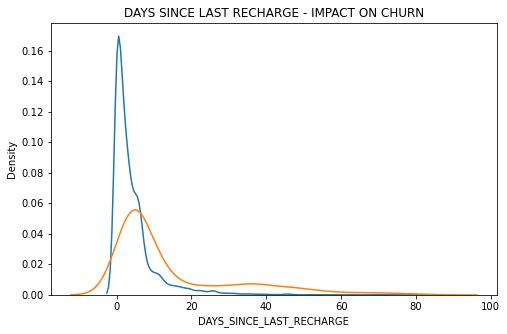

In [132]:
plt.figure(figsize = (8, 5))
sns.kdeplot(hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['churn'] == 0, 'days_since_last_rech'] , label='Churn = 0')
sns.kdeplot(hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['churn'] == 1, 'days_since_last_rech'] , label='Churn = 1')
plt.title('DAYS SINCE LAST RECHARGE - IMPACT ON CHURN');
plt.xlabel('DAYS_SINCE_LAST_RECHARGE')
plt.show()

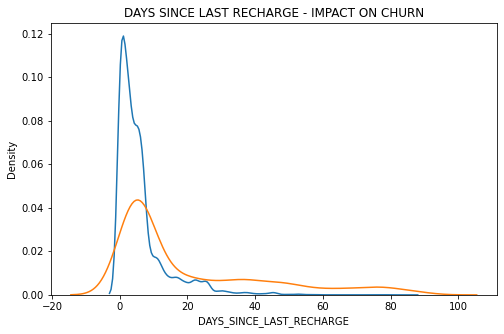

In [133]:
plt.figure(figsize = (8, 5))
sns.kdeplot(hvtelcom_testCSV_df.loc[hvtelcom_testCSV_df['churn'] == 0, 'days_since_last_rech'] , label='Churn = 0')
sns.kdeplot(hvtelcom_testCSV_df.loc[hvtelcom_testCSV_df['churn'] == 1, 'days_since_last_rech'] , label='Churn = 1')
plt.title('DAYS SINCE LAST RECHARGE - IMPACT ON CHURN');
plt.xlabel('DAYS_SINCE_LAST_RECHARGE')
plt.show()

### <font color = blue> Lets create derived feature called "recharge indicator" in each month </font>

In [134]:
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['date_of_last_rech_6'] == '01/01/0001','rech_ind_6']=0
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['date_of_last_rech_6'] != '01/01/0001','rech_ind_6']=1

In [135]:
hvtelcom_testCSV_df.loc[hvtelcom_testCSV_df['date_of_last_rech_6'] == '01/01/0001','rech_ind_6']=0
hvtelcom_testCSV_df.loc[hvtelcom_testCSV_df['date_of_last_rech_6'] != '01/01/0001','rech_ind_6']=1

In [136]:
hvtelcom_trainCSV_df.rech_ind_6.value_counts()

1.0    20976
0.0       42
Name: rech_ind_6, dtype: int64

In [137]:
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['date_of_last_rech_7'] == '01/01/0001','rech_ind_7']=0
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['date_of_last_rech_7'] != '01/01/0001','rech_ind_7']=1

In [138]:
hvtelcom_testCSV_df.loc[hvtelcom_testCSV_df['date_of_last_rech_7'] == '01/01/0001','rech_ind_7']=0
hvtelcom_testCSV_df.loc[hvtelcom_testCSV_df['date_of_last_rech_7'] != '01/01/0001','rech_ind_7']=1

In [139]:
hvtelcom_trainCSV_df.rech_ind_7.value_counts()

1.0    20936
0.0       82
Name: rech_ind_7, dtype: int64

In [140]:
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['date_of_last_rech_8'] == '01/01/0001','rech_ind_8']=0
hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['date_of_last_rech_8'] != '01/01/0001','rech_ind_8']=1

In [141]:
hvtelcom_testCSV_df.loc[hvtelcom_testCSV_df['date_of_last_rech_8'] == '01/01/0001','rech_ind_8']=0
hvtelcom_testCSV_df.loc[hvtelcom_testCSV_df['date_of_last_rech_8'] != '01/01/0001','rech_ind_8']=1

In [142]:
hvtelcom_trainCSV_df.rech_ind_8.value_counts()

1.0    20603
0.0      415
Name: rech_ind_8, dtype: int64

### <font color = blue > Lets now Check varaition in Churn behavior based on whether the Customer has recharged in August Month (action phase) </font>

<AxesSubplot:xlabel='rech_ind_8', ylabel='count'>

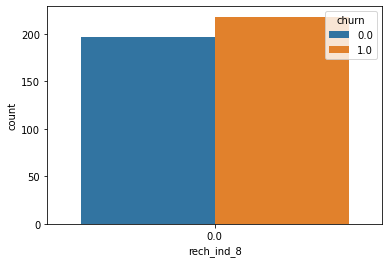

In [143]:
sns.countplot(x= 'rech_ind_8', hue = 'churn', data = hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['rech_ind_8'] == 0])

In [144]:
hvtelcom_trainCSV_df['rech_ind_good_phase']=(hvtelcom_trainCSV_df['rech_ind_6'] + hvtelcom_trainCSV_df['rech_ind_7'])/2

In [145]:
hvtelcom_testCSV_df['rech_ind_good_phase']=(hvtelcom_testCSV_df['rech_ind_6'] + hvtelcom_testCSV_df['rech_ind_7'])/2

In [146]:
hvtelcom_trainCSV_df['rech_diff_act_good_ph'] = (hvtelcom_trainCSV_df['rech_ind_8'] - hvtelcom_trainCSV_df['rech_ind_good_phase'])

In [147]:
hvtelcom_testCSV_df['rech_diff_act_good_ph'] = (hvtelcom_testCSV_df['rech_ind_8'] - hvtelcom_testCSV_df['rech_ind_good_phase'])

<AxesSubplot:xlabel='rech_diff_act_good_ph', ylabel='count'>

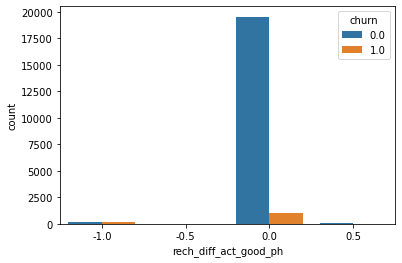

In [148]:
sns.countplot(x= 'rech_diff_act_good_ph', hue = 'churn', data = hvtelcom_trainCSV_df)

In [149]:
hvtelcom_trainCSV_df['rech_diff_act_good_ph'].value_counts()

 0.0    20532
-1.0      362
 0.5       71
-0.5       53
Name: rech_diff_act_good_ph, dtype: int64

<AxesSubplot:xlabel='rech_diff_act_good_ph', ylabel='count'>

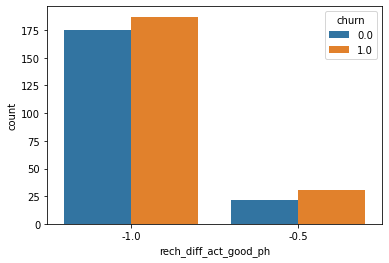

In [150]:
sns.countplot(x= 'rech_diff_act_good_ph', hue = 'churn', data = hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['rech_diff_act_good_ph'] < 0])

<AxesSubplot:xlabel='rech_diff_act_good_ph', ylabel='count'>

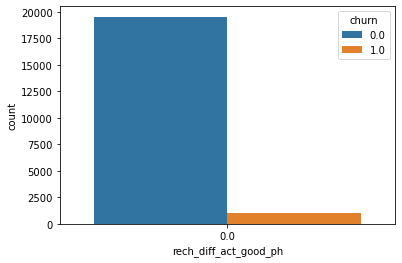

In [151]:
sns.countplot(x= 'rech_diff_act_good_ph', hue = 'churn', data = hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['rech_diff_act_good_ph'] == 0])

<AxesSubplot:xlabel='rech_diff_act_good_ph', ylabel='count'>

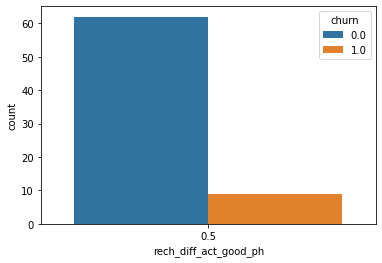

In [152]:
sns.countplot(x= 'rech_diff_act_good_ph', hue = 'churn', data = hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['rech_diff_act_good_ph'] > 0])

### <font color = blue> Let us now derive the feature difference between action phase and good phase in RECHARGE amount. Visualise thh impact of this on Churn </font>

In [153]:
hvtelcom_trainCSV_df['rech_amt_diff_act_good_ph'] = hvtelcom_trainCSV_df['total_rech_amt_8'] - hvtelcom_trainCSV_df['avg_rech_amt_goodph']

In [154]:
hvtelcom_testCSV_df['rech_amt_diff_act_good_ph'] = hvtelcom_testCSV_df['total_rech_amt_8'] - hvtelcom_testCSV_df['avg_rech_amt_goodph']

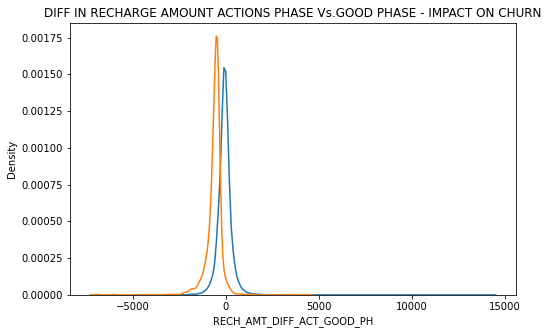

In [155]:
plt.figure(figsize = (8, 5))
sns.kdeplot(hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['churn'] == 0, 'rech_amt_diff_act_good_ph'] , label='Churn = 0')
sns.kdeplot(hvtelcom_trainCSV_df.loc[hvtelcom_trainCSV_df['churn'] == 1, 'rech_amt_diff_act_good_ph'] , label='Churn = 1')
plt.title('DIFF IN RECHARGE AMOUNT ACTIONS PHASE Vs.GOOD PHASE - IMPACT ON CHURN');
plt.xlabel('RECH_AMT_DIFF_ACT_GOOD_PH')
plt.show()

In [156]:
hvtelcom_trainCSV_df.shape

(21018, 121)

### <font color = blue> Drop the columns that have > 60% NULLS and which we have imputed but do not add any value to the model </font>

In [157]:
hvtelcom_trainCSV_df.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'],axis=1,inplace=True)

In [158]:
hvtelcom_testCSV_df.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'],axis=1,inplace=True)

In [159]:
hvtelcom_trainCSV_df.head()

id last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
12  12            6/30/2014            7/31/2014           2014-08-31   
15  15            6/30/2014            7/31/2014           2014-08-31   
23  23            6/30/2014            7/31/2014           2014-08-31   
24  24            6/30/2014            7/31/2014           2014-08-31   
25  25            6/30/2014            7/31/2014           2014-08-31   

      arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
12   439.919  397.946  392.024       244.46       108.31        42.98   
15   580.549  377.294  338.286        10.43        24.99       194.43   
23  1130.948  905.506  479.762       859.53       372.71         0.89   
24   371.974  352.069  240.449        93.18        38.29        29.86   
25   362.951  321.763  689.603       193.71       124.53       197.54   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
12        571.98        727.91        644.43            0.0            0.0   
15        317.11        341.79        197.09            0.0            0.0   
23        293.46        450.11        386.91            0.0            0.0   
24        531.19        507.76        222.03            0.0            0.0   
25        423.21        184.88        556.61            0.0            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
12            0.0            0.0            0.0            0.0   
15            0.0            0.0            0.0            0.0   
23            0.0            0.0            0.0            0.0   
24            0.0            0.0            0.0            0.0   
25            0.0            0.0            0.0            0.0   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
12               0.0               0.0              0.00         44.01   
15               0.0               0.0              0.00        327.46   
23               0.0               0.0              0.00        950.91   
24               0.0               0.0              0.36        252.48   
25               0.0               0.0              7.01        217.53   

    loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  \
12         21.79         55.23        772.43        814.43        632.18   
15        366.79        385.26          0.00          0.00          6.26   
23        822.78        387.79        202.08          0.00          0.00   
24        257.74        129.73        371.89        288.31        121.79   
25        190.49        311.91        399.39        114.51        416.99   

    isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  \
12           0.0           0.0           0.0          0.00          0.00   
15           0.0           0.0           0.0          0.08          0.00   
23           0.0           0.0           0.0          0.00          0.05   
24           0.0           0.0           0.0          0.00          0.00   
25           0.0           0.0           0.0          0.00          4.40   

    spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  \
12          0.00          0.0          0.0          0.0          816.44   
15          0.00          0.1          0.0          0.0          327.64   
23          0.01          0.0          0.0          0.0         1152.99   
24          0.36          0.0          0.0          0.0          624.38   
25         25.24          0.0          0.0          0.0          616.93   

    total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
12          836.23          687.41         26.93         26.21         24.53   
15          366.79          391.53        233.18        776.36        629.94   
23          822.83          387.81        391.38        448.21        202.89   
24          546.06          251.89        223.11        146.09        171.01   
25          309.41          754.16        370.73  

### <font color = blue> 'spl_og_mou_6','loc_og_mou_6','std_og_mou_6','isd_og_mou_6','og_others_6' add up to total_og_mou_6. SO dropping the individual redundant fields </font>

In [160]:
hvtelcom_trainCSV_df.drop(['spl_og_mou_6','loc_og_mou_6','std_og_mou_6','isd_og_mou_6','og_others_6','spl_ic_mou_6','loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','ic_others_6'],axis=1,inplace=True)

In [161]:
hvtelcom_testCSV_df.drop(['spl_og_mou_6','loc_og_mou_6','std_og_mou_6','isd_og_mou_6','og_others_6','spl_ic_mou_6','loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','ic_others_6'],axis=1,inplace=True)

In [162]:
hvtelcom_trainCSV_df.drop(['spl_og_mou_7','loc_og_mou_7','std_og_mou_7','isd_og_mou_7','og_others_7','spl_ic_mou_7','loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','ic_others_7'],axis=1,inplace=True)

In [163]:
hvtelcom_testCSV_df.drop(['spl_og_mou_7','loc_og_mou_7','std_og_mou_7','isd_og_mou_7','og_others_7','spl_ic_mou_7','loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','ic_others_7'],axis=1,inplace=True)

In [164]:
hvtelcom_trainCSV_df.drop(['spl_og_mou_8','loc_og_mou_8','std_og_mou_8','isd_og_mou_8','og_others_8','spl_ic_mou_8','loc_ic_mou_8','std_ic_mou_8','isd_ic_mou_8','ic_others_8'],axis=1,inplace=True)

In [165]:
hvtelcom_testCSV_df.drop(['spl_og_mou_8','loc_og_mou_8','std_og_mou_8','isd_og_mou_8','og_others_8','spl_ic_mou_8','loc_ic_mou_8','std_ic_mou_8','isd_ic_mou_8','ic_others_8'],axis=1,inplace=True)

In [166]:
hvtelcom_trainCSV_df.shape

(21018, 76)

In [167]:
hvtelcom_trainCSV_df.tail()

id last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
69981  69981            6/30/2014            7/31/2014           2014-08-31   
69983  69983            6/30/2014            7/31/2014           2014-08-31   
69984  69984            6/30/2014            7/31/2014           2014-08-31   
69990  69990            6/30/2014            7/31/2014           2014-08-31   
69996  69996            6/30/2014            7/31/2014           2014-08-31   

         arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
69981   357.480   717.944   252.875       486.49       378.21       380.99   
69983   256.106   173.079   277.018       399.01       283.63       184.43   
69984  1106.130  1609.381  1686.392        84.91       133.44       178.08   
69990   240.088   474.411   699.991         7.19        16.78        16.41   
69996   372.088   258.374   279.782        77.13        68.44        78.44   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
69981        617.98        772.53        718.61            0.0            0.0   
69983        360.88        321.69        181.64            0.0            0.0   
69984        823.86        645.89        703.19            0.0            0.0   
69990        246.39        809.03        783.66            6.6            0.0   
69996        335.54        227.94        263.84            0.0            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
69981            0.0           0.00            0.0            0.0   
69983            0.0           0.00            0.0            0.0   
69984            0.0           0.00            0.0            0.0   
69990            0.0          12.08            0.0            0.0   
69996            0.0           0.00            0.0            0.0   

       loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  total_og_mou_6  \
69981              0.00             11.51              0.00         1104.48   
69983              1.86              9.66              9.11          759.89   
69984              0.00              6.15              5.26          916.79   
69990              0.00              0.00             12.68          241.51   
69996              0.00              4.10              0.00          412.68   

       total_og_mou_7  total_og_mou_8  total_ic_mou_6  total_ic_mou_7  \
69981         1150.74         1099.61          440.63          568.68   
69983          605.33          366.08           22.59           41.49   
69984          797.13          915.38          343.16          274.94   
69990          825.81          800.08           26.76           91.69   
69996          296.39          342.29          542.18          416.58   

       total_ic_mou_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  \
69981          551.36                 7                 2                 4   
69983           43.78                 4                 5                 2   
69984          318.86                 5                 5                 4   
69990          145.03                14                24                33   
69996          414.54                 3                 1                 4   

       total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  \
69981               667               554              1080             169   
69983               342               478                67             110   
69984              1896               900              1950             599   
69990               346               480               796             110   
69996               626               250               397             279   

       max_rech_amt_7  max_rech_amt_8 date_of_last_rech_6 date_of_last_rech_7  \
69981             325             550           6/18/2014           7/28/2014   
69983             130              67           6/18/2014           7/31/2014   
69984             550            1000           6/27/2014

### <font color = blue> Lets drop all DATE fields </font>

In [168]:
hvtelcom_trainCSV_df.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech'],axis=1,inplace=True)

In [169]:
hvtelcom_testCSV_df.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech'],axis=1,inplace=True)

In [170]:
hvtelcom_trainCSV_df.shape

(21018, 69)

In [171]:
hvtelcom_trainCSV_df.head(10)

id    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
12  12   439.919   397.946   392.024       244.46       108.31        42.98   
15  15   580.549   377.294   338.286        10.43        24.99       194.43   
23  23  1130.948   905.506   479.762       859.53       372.71         0.89   
24  24   371.974   352.069   240.449        93.18        38.29        29.86   
25  25   362.951   321.763   689.603       193.71       124.53       197.54   
27  27   390.489   350.985   421.300         8.58        11.48        12.68   
39  39   348.187   630.031   974.914        64.66       598.74       565.66   
45  45  1361.775  1658.481  1317.325       872.16       546.06      1078.93   
49  49   396.336   681.418   556.464       119.06       198.08       179.56   
51  51   324.800   442.005   376.670        55.88        97.54        44.63   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
12        571.98        727.91        644.43           0.00           0.00   
15        317.11        341.79        197.09           0.00           0.00   
23        293.46        450.11        386.91           0.00           0.00   
24        531.19        507.76        222.03           0.00           0.00   
25        423.21        184.88        556.61           0.00           0.00   
27        133.16        158.73        182.83           0.00           0.00   
39         37.83        339.28        558.59           0.00           0.00   
45        410.56        420.19        225.53           8.83         149.04   
49        537.26       1059.59        967.99           0.00           0.00   
51        168.04        258.29        223.18           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
12            0.0           0.00           0.00            0.0   
15            0.0           0.00           0.00            0.0   
23            0.0           0.00           0.00            0.0   
24            0.0           0.00           0.00            0.0   
25            0.0           0.00           0.00            0.0   
27            0.0           0.00           0.00            0.0   
39            0.0           0.00           0.00            0.0   
45            0.0           6.43         388.73            0.0   
49            0.0           0.00           0.00            0.0   
51            0.0           0.00           0.00            0.0   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  total_og_mou_6  \
12              0.00              0.00              0.00          816.44   
15              0.00              0.00              0.00          327.64   
23              0.00              0.00              0.00         1152.99   
24              0.00              0.00              0.36          624.38   
25              0.00              0.00              7.01          616.93   
27              0.00              0.00              0.00          141.74   
39              0.00              0.00              0.00          102.49   
45              2.44              0.25              0.18         1288.06   
49              0.61              0.00              0.24          656.33   
51              0.78              0.00              1.15          224.71   

    total_og_mou_7  total_og_mou_8  total_ic_mou_6  total_ic_mou_7  \
12          836.23          687.41           34.49           35.34   
15          366.79          391.53          233.18          777.39   
23          822.83          387.81          598.54          448.36   
24          546.06          251.89          230.08          155.64   
25          309.41          754.16          401.39          319.08   
27          170.21          195.51          283.48          366.03   
39          938.03         1124.26          257.33          197.48   
45          583.93         1307.86          574.04          453.14   
49         1257.68         1148.54           39.34           48.04   
51         

In [172]:
diff_col_list=['arpu','onnet_mou','offnet_mou','roam_ic_mou','roam_og_mou','loc_og_t2c_mou','total_og_mou','total_ic_mou','total_rech_num','max_rech_amt','last_day_rch_amt','vol_2g_mb','vol_3g_mb','monthly_2g','sachet_2g','monthly_3g','sachet_3g']
diff_col_list_corr=['churn']
for col in diff_col_list:
    hvtelcom_trainCSV_df[col+'_diff_act_good_ph'] = (hvtelcom_trainCSV_df[col+'_8'] - ((hvtelcom_trainCSV_df[col+'_6'] + hvtelcom_trainCSV_df[col+'_7'])/2))
    hvtelcom_testCSV_df[col+'_diff_act_good_ph'] = (hvtelcom_testCSV_df[col+'_8'] - ((hvtelcom_testCSV_df[col+'_6'] + hvtelcom_testCSV_df[col+'_7'])/2))
    diff_col_list_corr.append(col+'_diff_act_good_ph')

In [173]:
diff_col_list_corr

['churn',
 'arpu_diff_act_good_ph',
 'onnet_mou_diff_act_good_ph',
 'offnet_mou_diff_act_good_ph',
 'roam_ic_mou_diff_act_good_ph',
 'roam_og_mou_diff_act_good_ph',
 'loc_og_t2c_mou_diff_act_good_ph',
 'total_og_mou_diff_act_good_ph',
 'total_ic_mou_diff_act_good_ph',
 'total_rech_num_diff_act_good_ph',
 'max_rech_amt_diff_act_good_ph',
 'last_day_rch_amt_diff_act_good_ph',
 'vol_2g_mb_diff_act_good_ph',
 'vol_3g_mb_diff_act_good_ph',
 'monthly_2g_diff_act_good_ph',
 'sachet_2g_diff_act_good_ph',
 'monthly_3g_diff_act_good_ph',
 'sachet_3g_diff_act_good_ph']

In [174]:
hvtelcom_trainCSV_df['vbc_3g_diff_act_good_ph'] = (hvtelcom_trainCSV_df['aug_vbc_3g'] - ((hvtelcom_trainCSV_df['jul_vbc_3g'] + hvtelcom_trainCSV_df['jun_vbc_3g'])/2))
diff_col_list_corr.append('days_since_last_rech')
diff_col_list_corr.append('rech_amt_diff_act_good_ph')
diff_col_list_corr.append('rech_diff_act_good_ph')
diff_col_list_corr.append('vbc_3g_diff_act_good_ph')

In [175]:
hvtelcom_testCSV_df['vbc_3g_diff_act_good_ph'] = (hvtelcom_testCSV_df['aug_vbc_3g'] - ((hvtelcom_testCSV_df['jul_vbc_3g'] + hvtelcom_testCSV_df['jun_vbc_3g'])/2))

<AxesSubplot:>

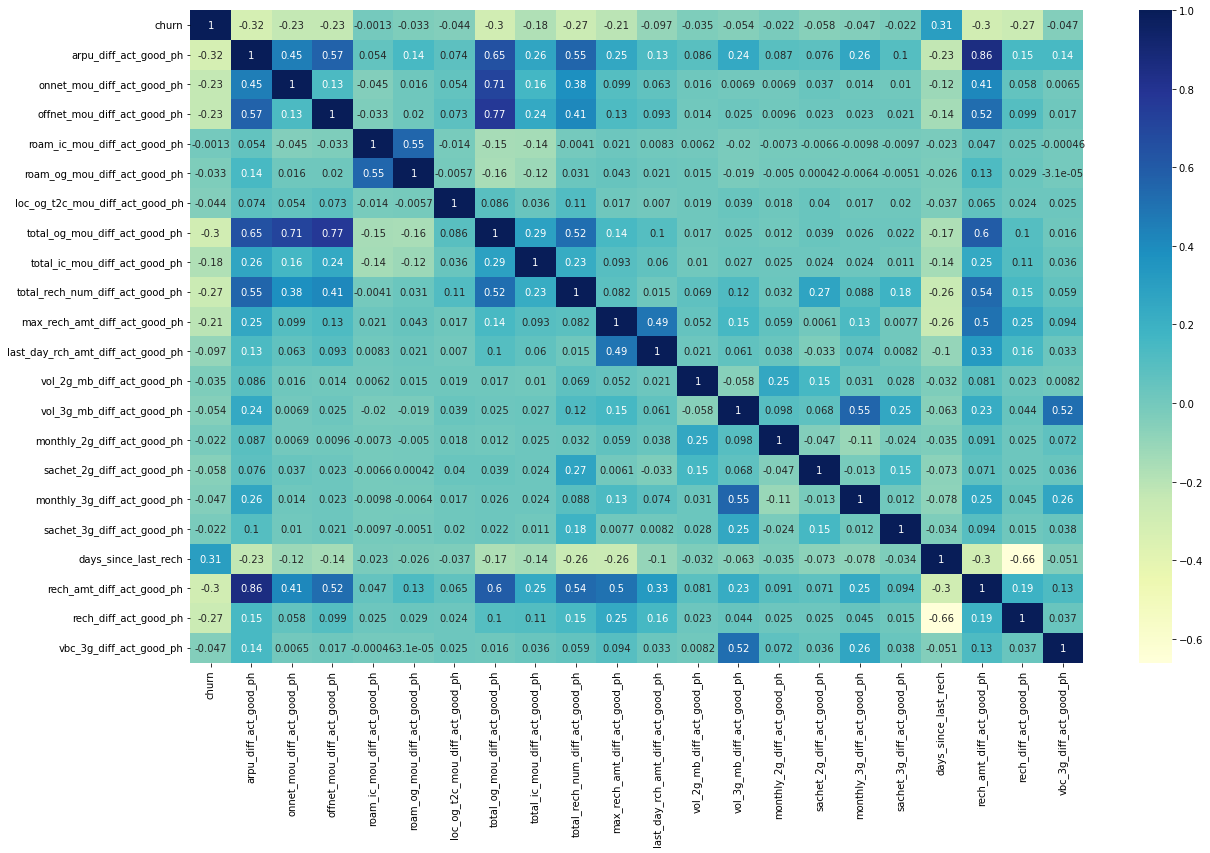

In [176]:
# Set the figure size
plt.figure(figsize=(20,12))
sns.heatmap(hvtelcom_trainCSV_df[diff_col_list_corr].corr(),cmap='YlGnBu', annot=True)

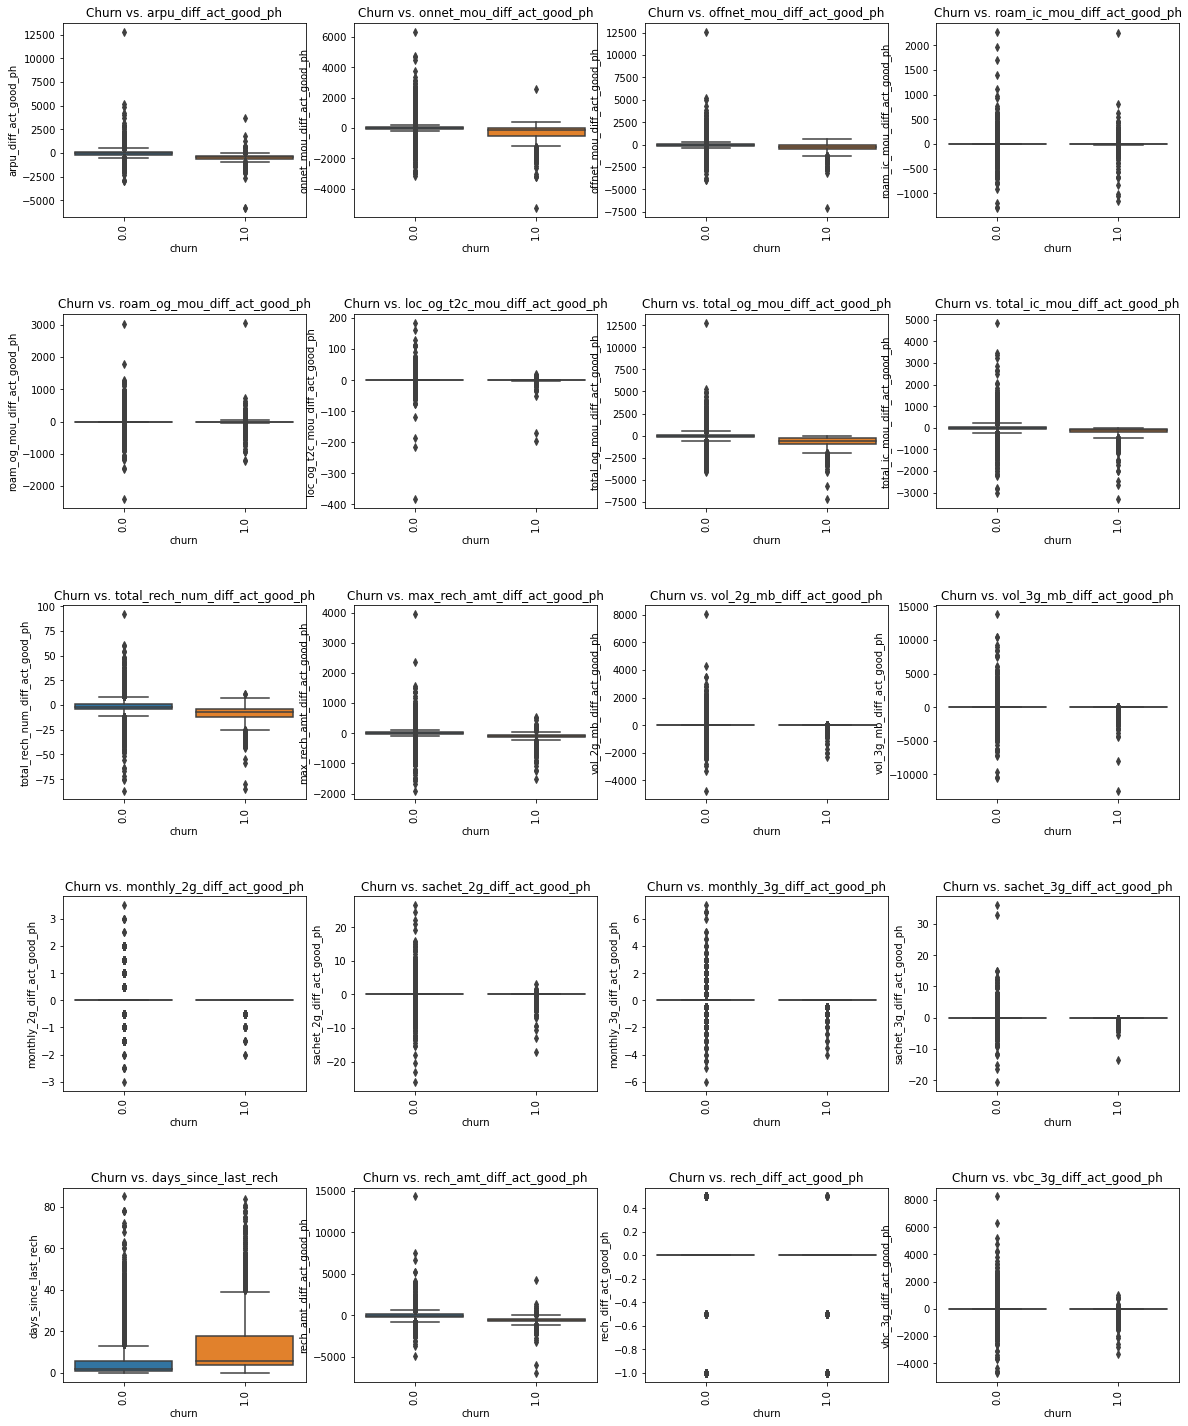

In [177]:
# Create a box plot of all the diff variables vs Churn
plt.figure(figsize=(20,25))
# 'last_day_rch_amt_diff_act_good_ph',
diff_col_list_new=[
 'arpu_diff_act_good_ph',
 'onnet_mou_diff_act_good_ph',
 'offnet_mou_diff_act_good_ph',
 'roam_ic_mou_diff_act_good_ph',
 'roam_og_mou_diff_act_good_ph',
 'loc_og_t2c_mou_diff_act_good_ph',
 'total_og_mou_diff_act_good_ph',
 'total_ic_mou_diff_act_good_ph',
 'total_rech_num_diff_act_good_ph',
 'max_rech_amt_diff_act_good_ph',
 'vol_2g_mb_diff_act_good_ph',
 'vol_3g_mb_diff_act_good_ph',
 'monthly_2g_diff_act_good_ph',
 'sachet_2g_diff_act_good_ph',
 'monthly_3g_diff_act_good_ph',
 'sachet_3g_diff_act_good_ph',
 'days_since_last_rech',
 'rech_amt_diff_act_good_ph',
 'rech_diff_act_good_ph',
 'vbc_3g_diff_act_good_ph']
for j in range(len(diff_col_list_new)):
    var=diff_col_list_new[j]
    plt.subplot(5, 4, j+1)
    plt.title('Churn vs. '+var)
    sns.boxplot(x='churn',y=var,data=hvtelcom_trainCSV_df)
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace = 0.5)

In [178]:
hvtelcom_trainCSV_df.head()

id    arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
12  12   439.919  397.946  392.024       244.46       108.31        42.98   
15  15   580.549  377.294  338.286        10.43        24.99       194.43   
23  23  1130.948  905.506  479.762       859.53       372.71         0.89   
24  24   371.974  352.069  240.449        93.18        38.29        29.86   
25  25   362.951  321.763  689.603       193.71       124.53       197.54   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
12        571.98        727.91        644.43            0.0            0.0   
15        317.11        341.79        197.09            0.0            0.0   
23        293.46        450.11        386.91            0.0            0.0   
24        531.19        507.76        222.03            0.0            0.0   
25        423.21        184.88        556.61            0.0            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
12            0.0            0.0            0.0            0.0   
15            0.0            0.0            0.0            0.0   
23            0.0            0.0            0.0            0.0   
24            0.0            0.0            0.0            0.0   
25            0.0            0.0            0.0            0.0   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  total_og_mou_6  \
12               0.0               0.0              0.00          816.44   
15               0.0               0.0              0.00          327.64   
23               0.0               0.0              0.00         1152.99   
24               0.0               0.0              0.36          624.38   
25               0.0               0.0              7.01          616.93   

    total_og_mou_7  total_og_mou_8  total_ic_mou_6  total_ic_mou_7  \
12          836.23          687.41           34.49           35.34   
15          366.79          391.53          233.18          777.39   
23          822.83          387.81          598.54          448.36   
24          546.06          251.89          230.08          155.64   
25          309.41          754.16          401.39          319.08   

    total_ic_mou_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  \
12           26.99                15                10                20   
15          629.94                 5                 3                 4   
23          203.29                26                19                10   
24          192.94                 7                 7                10   
25          454.91                 8                 5                11   

    total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  \
12               521               418               365             110   
15               654               400               652             250   
23              1420               990               494             110   
24               440               427               240             110   
25               330               480               730             110   

    max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
12             110              50                 110                   0   
15             250             250                   0                 150   
23             110             144                 110                  50   
24             110              30                 110                   0   
25             150             130                 110                 150   

    last_day_rch_amt_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  \
12                   0         0.00          0.0         0.00          0.0   
15                 250       260.42          0.0       354.35          0.0   
23                  30         0.00          0.0         0.00          0.0   
24                  30         0.04          0.0         0.00          0.0   
25                  50  

In [179]:
hvtelcom_trainCSV_df_new=hvtelcom_trainCSV_df.copy()
hvtelcom_trainCSV_df_new.drop(['avg_rech_amt_goodph','jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','arpu_6','arpu_7','arpu_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','rech_ind_6','rech_ind_7','rech_ind_8','rech_ind_good_phase','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'],axis=1,inplace=True)

In [180]:
hvtelcom_trainCSV_df_new.head()

id   aon  churn_probability  churn  days_since_last_rech  \
12  12   322                  0    0.0                     1   
15  15   602                  0    0.0                     1   
23  23   455                  0    0.0                     9   
24  24  1219                  0    0.0                     1   
25  25  2831                  0    0.0                     1   

    rech_diff_act_good_ph  rech_amt_diff_act_good_ph  arpu_diff_act_good_ph  \
12                    0.0                     -104.5               -26.9085   
15                    0.0                      125.0              -140.6355   
23                    0.0                     -711.0              -538.4650   
24                    0.0                     -193.5              -121.5725   
25                    0.0                      325.0               347.2460   

    onnet_mou_diff_act_good_ph  offnet_mou_diff_act_good_ph  \
12                    -133.405                       -5.515   
15                     176.720                     -132.360   
23                    -615.230                       15.125   
24                     -35.875                     -297.445   
25                      38.420                      252.565   

    roam_ic_mou_diff_act_good_ph  roam_og_mou_diff_act_good_ph  \
12                           0.0                           0.0   
15                           0.0                           0.0   
23                           0.0                           0.0   
24                           0.0                           0.0   
25                           0.0                           0.0   

    loc_og_t2c_mou_diff_act_good_ph  total_og_mou_diff_act_good_ph  \
12                             0.00                       -138.925   
15                             0.00                         44.315   
23                             0.00                       -600.100   
24                             0.36                       -333.330   
25                             7.01                        290.990   

    total_ic_mou_diff_act_good_ph  total_rech_num_diff_act_good_ph  \
12                         -7.925                              7.5   
15                        124.655                              0.0   
23                       -320.160                            -12.5   
24                          0.080                              3.0   
25                         94.675                              4.5   

    max_rech_amt_diff_act_good_ph  last_day_rch_amt_diff_act_good_ph  \
12                          -60.0                              -55.0   
15                            0.0                              175.0   
23                           34.0                              -50.0   
24                          -80.0                              -25.0   
25                            0.0                              -80.0   

    vol_2g_mb_diff_act_good_ph  vol_3g_mb_diff_act_good_ph  \
12                        0.00                         0.0   
15                      224.14                         0.0   
23                        0.00                         0.0   
24                       -0.02                         0.0   
25                        0.00                         0.0   

    monthly_2g_diff_act_good_ph  sachet_2g_diff_act_good_ph  \
12                          0.0                         0.0   
15                          0.5                         0.0   
23                          0.0                         0.0   
24                          0.0                        -0.5   
25                          0.0                         0.0   

    monthly_3g_diff_act_good_ph  sachet_3g_diff_act_good_ph  \
12                          0.0                         0.0   
15                          0.0                         0.0   
23                          0.0                         0.0   
24                          0.0                         0.0   
25                        

In [181]:
hvtelcom_testCSV_df_new=hvtelcom_testCSV_df.copy()
hvtelcom_testCSV_df_new.drop(['avg_rech_amt_goodph','jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','arpu_6','arpu_7','arpu_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','rech_ind_6','rech_ind_7','rech_ind_8','rech_ind_good_phase','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'],axis=1,inplace=True)

<AxesSubplot:>

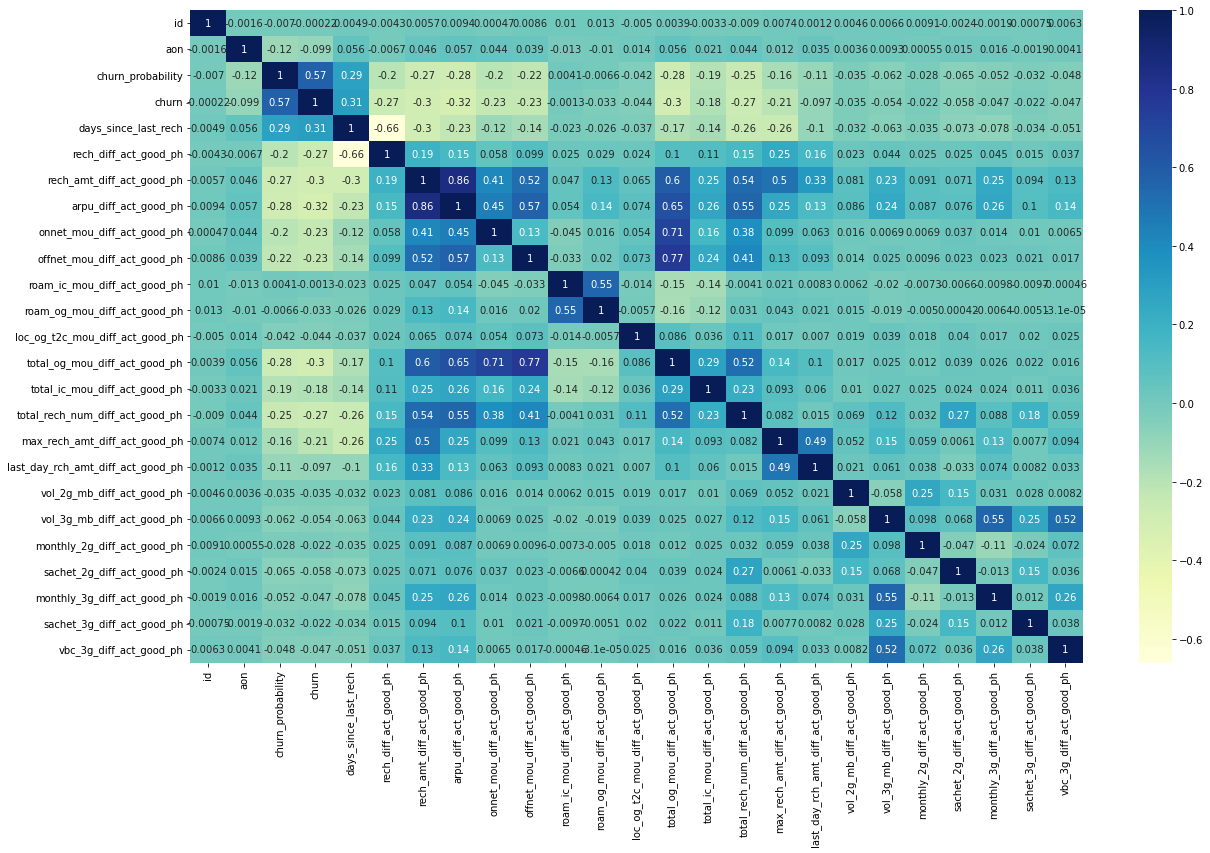

In [182]:
# Set the figure size
plt.figure(figsize=(20,12))
sns.heatmap(hvtelcom_trainCSV_df_new.corr(),cmap='YlGnBu', annot=True)

In [183]:
cor=hvtelcom_trainCSV_df_new.corr()
cor.loc[abs(cor['churn']) < 0.1]['churn']

id                                  -0.000217
aon                                 -0.098738
roam_ic_mou_diff_act_good_ph        -0.001300
roam_og_mou_diff_act_good_ph        -0.032907
loc_og_t2c_mou_diff_act_good_ph     -0.044492
last_day_rch_amt_diff_act_good_ph   -0.096537
vol_2g_mb_diff_act_good_ph          -0.034932
vol_3g_mb_diff_act_good_ph          -0.054013
monthly_2g_diff_act_good_ph         -0.021514
sachet_2g_diff_act_good_ph          -0.057743
monthly_3g_diff_act_good_ph         -0.046907
sachet_3g_diff_act_good_ph          -0.022057
vbc_3g_diff_act_good_ph             -0.046950
Name: churn, dtype: float64

In [184]:
hvtelcom_trainCSV_df_new.drop(['roam_ic_mou_diff_act_good_ph','roam_og_mou_diff_act_good_ph','loc_og_t2c_mou_diff_act_good_ph','last_day_rch_amt_diff_act_good_ph','vol_2g_mb_diff_act_good_ph','vol_3g_mb_diff_act_good_ph','monthly_2g_diff_act_good_ph','sachet_2g_diff_act_good_ph','monthly_3g_diff_act_good_ph','sachet_3g_diff_act_good_ph','vbc_3g_diff_act_good_ph'],axis=1,inplace=True)

In [185]:
hvtelcom_testCSV_df_new.drop(['roam_ic_mou_diff_act_good_ph','roam_og_mou_diff_act_good_ph','loc_og_t2c_mou_diff_act_good_ph','last_day_rch_amt_diff_act_good_ph','vol_2g_mb_diff_act_good_ph','vol_3g_mb_diff_act_good_ph','monthly_2g_diff_act_good_ph','sachet_2g_diff_act_good_ph','monthly_3g_diff_act_good_ph','sachet_3g_diff_act_good_ph','vbc_3g_diff_act_good_ph'],axis=1,inplace=True)

<AxesSubplot:>

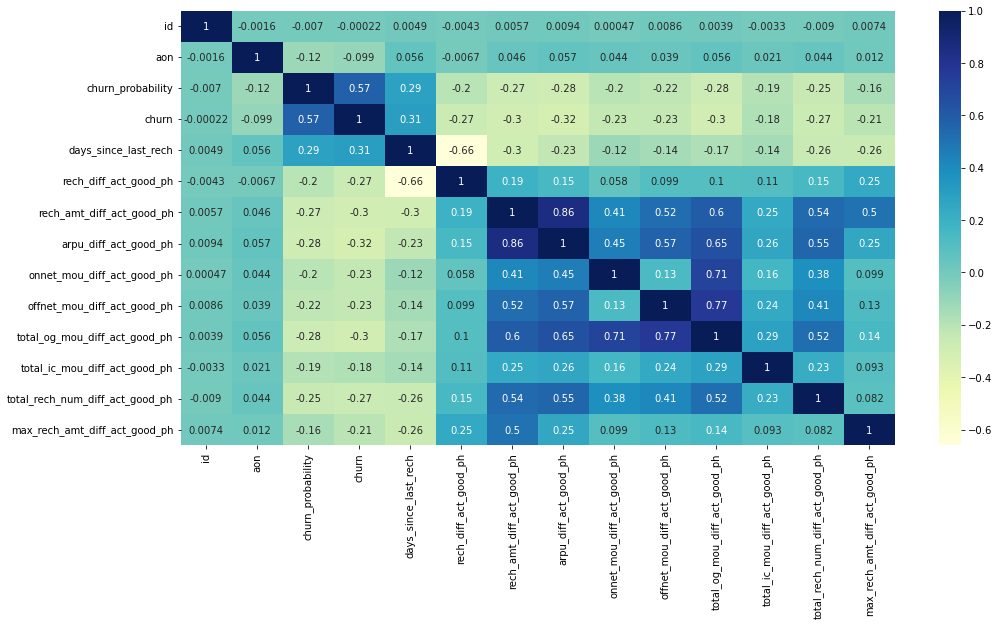

In [186]:
# Set the figure size
plt.figure(figsize=(16,8))
sns.heatmap(hvtelcom_trainCSV_df_new.corr(),cmap='YlGnBu', annot=True)

In [187]:
# Drop Avg Revenue column since we are doing Usage based Churn prediction
hvtelcom_trainCSV_df_new.drop(['arpu_diff_act_good_ph'],axis=1,inplace=True)

In [188]:
hvtelcom_testCSV_df_new.drop(['arpu_diff_act_good_ph'],axis=1,inplace=True)

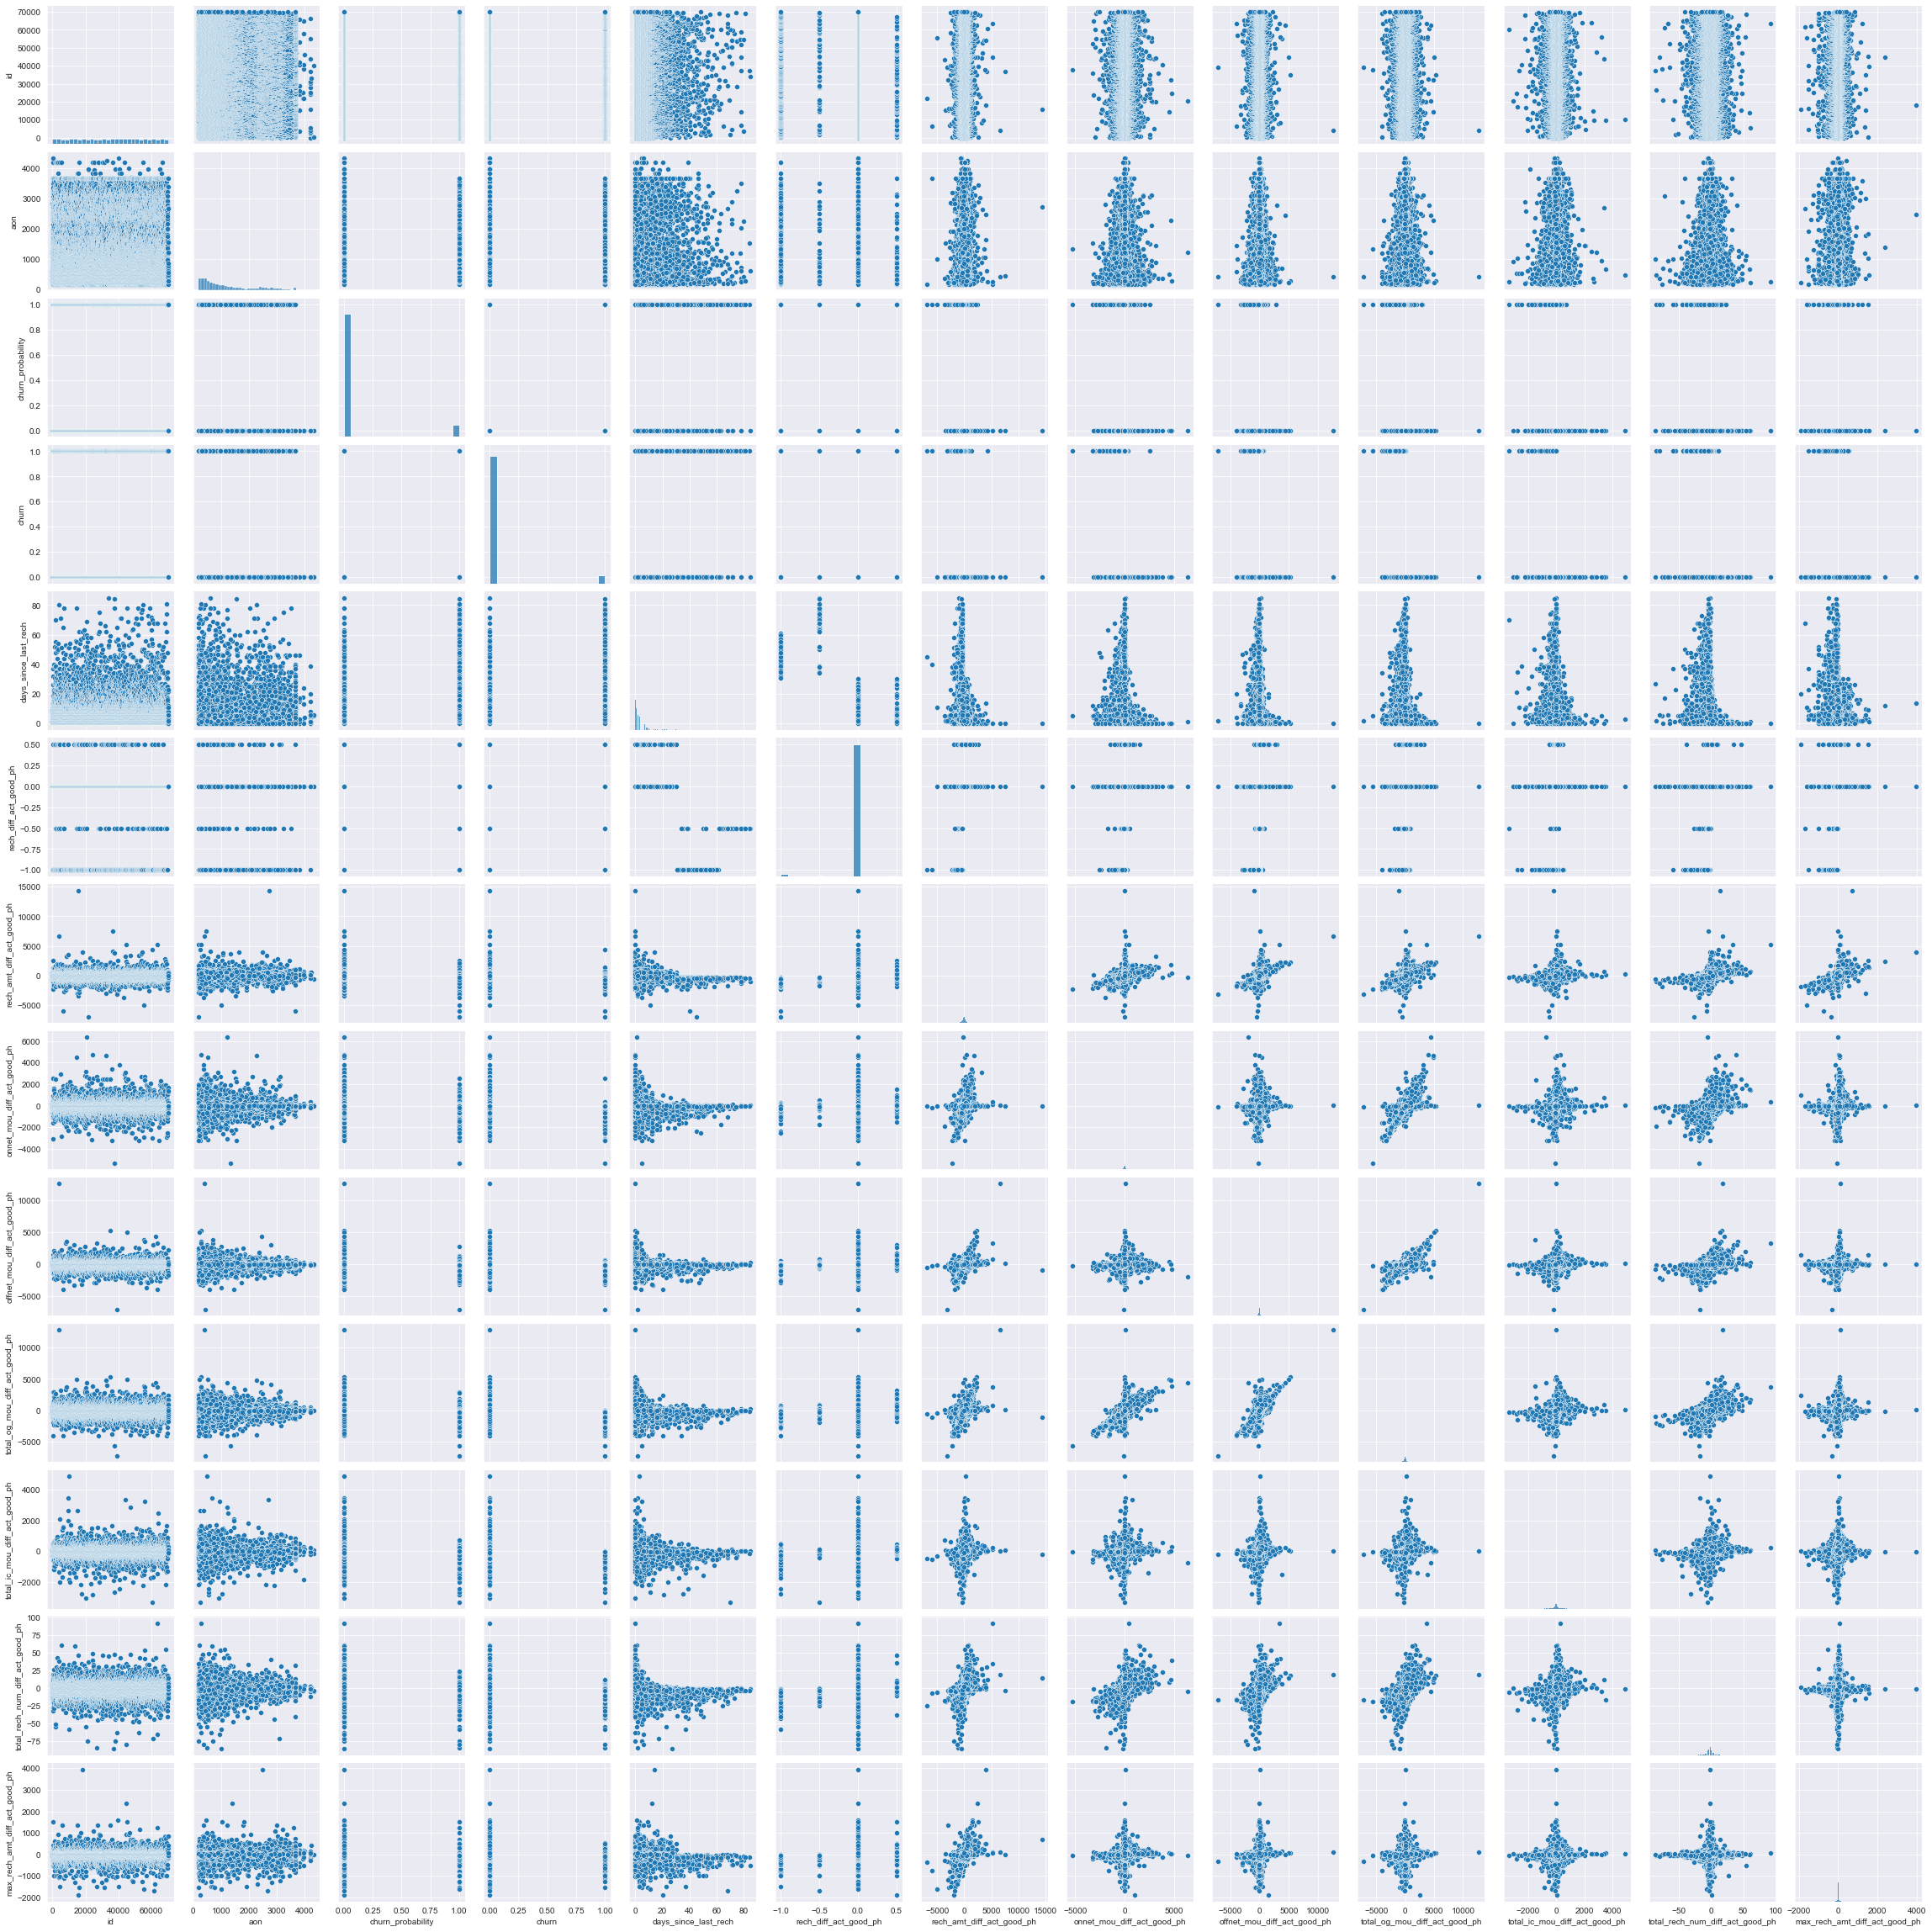

In [189]:
# Visualize pair-wise relationship between the numeric variables
sns.set_style("darkgrid")
sns.pairplot(hvtelcom_trainCSV_df_new)

In [190]:
hvtelcom_trainCSV_df_new.head()

id   aon  churn_probability  churn  days_since_last_rech  \
12  12   322                  0    0.0                     1   
15  15   602                  0    0.0                     1   
23  23   455                  0    0.0                     9   
24  24  1219                  0    0.0                     1   
25  25  2831                  0    0.0                     1   

    rech_diff_act_good_ph  rech_amt_diff_act_good_ph  \
12                    0.0                     -104.5   
15                    0.0                      125.0   
23                    0.0                     -711.0   
24                    0.0                     -193.5   
25                    0.0                      325.0   

    onnet_mou_diff_act_good_ph  offnet_mou_diff_act_good_ph  \
12                    -133.405                       -5.515   
15                     176.720                     -132.360   
23                    -615.230                       15.125   
24                     -35.875                     -297.445   
25                      38.420                      252.565   

    total_og_mou_diff_act_good_ph  total_ic_mou_diff_act_good_ph  \
12                       -138.925                         -7.925   
15                         44.315                        124.655   
23                       -600.100                       -320.160   
24                       -333.330                          0.080   
25                        290.990                         94.675   

    total_rech_num_diff_act_good_ph  max_rech_amt_diff_act_good_ph  
12                              7.5                          -60.0  
15                              0.0                            0.0  
23                            -12.5                           34.0  
24                              3.0                          -80.0  
25                              4.5                            0.0

In [191]:
num_vars = list(hvtelcom_trainCSV_df_new.drop(['churn'],axis=1).columns)
num_vars

['id',
 'aon',
 'churn_probability',
 'days_since_last_rech',
 'rech_diff_act_good_ph',
 'rech_amt_diff_act_good_ph',
 'onnet_mou_diff_act_good_ph',
 'offnet_mou_diff_act_good_ph',
 'total_og_mou_diff_act_good_ph',
 'total_ic_mou_diff_act_good_ph',
 'total_rech_num_diff_act_good_ph',
 'max_rech_amt_diff_act_good_ph']

In [192]:
hvtelcom_trainCSV_df_new['churn']=hvtelcom_trainCSV_df_new['churn'].astype('int')

In [193]:
hvtelcom_testCSV_df_new['churn']=hvtelcom_testCSV_df_new['churn'].astype('int')

## <font color=blue>Part 2 : Data Preparation - Scaling</font>

Text(0.5, 1.0, 'Churn Data Imbalance')

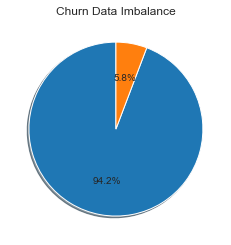

In [194]:
pie_sizes_m = hvtelcom_trainCSV_df_new['churn'].value_counts()/len(hvtelcom_trainCSV_df_new.index) * 100
plt.pie(pie_sizes_m, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Churn Data Imbalance')

Text(0.5, 1.0, 'Churn Data Imbalance')

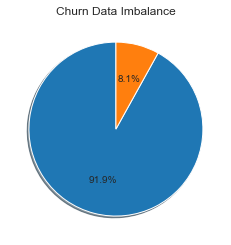

In [195]:
pie_sizes_m = hvtelcom_testCSV_df_new['churn'].value_counts()/len(hvtelcom_testCSV_df_new.index) * 100
plt.pie(pie_sizes_m, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Churn Data Imbalance')

In [196]:
# Drop Lead Number, Converted fields to form the X features
X=hvtelcom_trainCSV_df_new.drop(['churn'], axis =1)
X.head()

id   aon  churn_probability  days_since_last_rech  rech_diff_act_good_ph  \
12  12   322                  0                     1                    0.0   
15  15   602                  0                     1                    0.0   
23  23   455                  0                     9                    0.0   
24  24  1219                  0                     1                    0.0   
25  25  2831                  0                     1                    0.0   

    rech_amt_diff_act_good_ph  onnet_mou_diff_act_good_ph  \
12                     -104.5                    -133.405   
15                      125.0                     176.720   
23                     -711.0                    -615.230   
24                     -193.5                     -35.875   
25                      325.0                      38.420   

    offnet_mou_diff_act_good_ph  total_og_mou_diff_act_good_ph  \
12                       -5.515                       -138.925   
15                     -132.360                         44.315   
23                       15.125                       -600.100   
24                     -297.445                       -333.330   
25                      252.565                        290.990   

    total_ic_mou_diff_act_good_ph  total_rech_num_diff_act_good_ph  \
12                         -7.925                              7.5   
15                        124.655                              0.0   
23                       -320.160                            -12.5   
24                          0.080                              3.0   
25                         94.675                              4.5   

    max_rech_amt_diff_act_good_ph  
12                          -60.0  
15                            0.0  
23                           34.0  
24                          -80.0  
25                            0.0

In [197]:
TestCSV_Transformed_Data =hvtelcom_testCSV_df_new.drop(['churn'], axis =1)
TestCSV_Transformed_Data.head()

id   aon  days_since_last_rech  rech_diff_act_good_ph  \
0  69999  1692                   7.0                    0.0   
1  70000  2533                   7.0                    0.0   
2  70001   277                   3.0                    0.0   
3  70002  1244                   7.0                    0.0   
4  70003   462                   1.0                    0.0   

   rech_amt_diff_act_good_ph  onnet_mou_diff_act_good_ph  \
0                      -36.5                      -2.895   
1                        0.0                     -38.520   
2                      250.0                       0.700   
3                     -185.0                      -3.735   
4                      123.0                     170.700   

   offnet_mou_diff_act_good_ph  total_og_mou_diff_act_good_ph  \
0                      -11.330                        -14.225   
1                     -153.150                       -190.870   
2                       13.645                          0.000   
3                      -98.515                       -102.260   
4                       31.770                        203.245   

   total_ic_mou_diff_act_good_ph  total_rech_num_diff_act_good_ph  \
0                         -6.385                             -1.0   
1                        -36.325                              0.5   
2                          0.000                             -2.5   
3                         10.065                             -2.0   
4                         74.430                             -1.0   

   max_rech_amt_diff_act_good_ph  
0                          -10.0  
1                            0.0  
2                          100.0  
3                         -130.0  
4                           20.0

In [198]:
# Create the Y variable
y = hvtelcom_trainCSV_df_new['churn']
y.head()

12    0
15    0
23    0
24    0
25    0
Name: churn, dtype: int32

### <font color = blue> DATA Balancing - Lets Over sample the data using SMOTE to balance the Data </font>

In [199]:
# Split 70:30 into Training and validation Data
X_train1,X_Validation,y_train1,y_Validation = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)
oversampler = SMOTE(random_state=0)
os_X_train,os_y_train = oversampler.fit_resample(X_train1,y_train1)

In [200]:
X_train=pd.DataFrame(os_X_train)
X_train.columns=num_vars

X_train.head()

id   aon  churn_probability  days_since_last_rech  \
0  51086  2907                  0                     0   
1  54295  1501                  0                     2   
2  45845   715                  0                     6   
3  35798  1326                  0                     6   
4  57116  3100                  0                     7   

   rech_diff_act_good_ph  rech_amt_diff_act_good_ph  \
0                    0.0                     -113.5   
1                    0.0                     -379.0   
2                    0.0                     -260.0   
3                    0.0                     -175.0   
4                    0.0                     -170.0   

   onnet_mou_diff_act_good_ph  offnet_mou_diff_act_good_ph  \
0                      -45.10                     -112.695   
1                      -55.15                     -160.580   
2                      -24.89                       -7.260   
3                       29.17                      -86.210   
4                       80.17                      -41.755   

   total_og_mou_diff_act_good_ph  total_ic_mou_diff_act_good_ph  \
0                       -202.200                        -171.28   
1                       -215.740                        -157.08   
2                        -28.570                         -11.15   
3                        -56.480                          21.84   
4                         38.415                          38.92   

   total_rech_num_diff_act_good_ph  max_rech_amt_diff_act_good_ph  
0                              1.0                           54.5  
1                             -5.0                           45.0  
2                             -1.0                          -90.0  
3                              0.0                           20.0  
4                             -2.5                           10.0

In [201]:
y_train=os_y_train.tolist()

In [202]:
# Instantiate an object of MinMaxScaler
standard_scaler = StandardScaler()

# Fit & transform numerical variables using fit_transform()
scaler = StandardScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

id       aon  churn_probability  days_since_last_rech  \
0  0.799015  2.160262           -0.64557             -0.745246   
1  0.958913  0.514026           -0.64557             -0.580821   
2  0.537867 -0.406274           -0.64557             -0.251972   
3  0.037247  0.309125           -0.64557             -0.251972   
4  1.099477  2.386239           -0.64557             -0.169760   

   rech_diff_act_good_ph  rech_amt_diff_act_good_ph  \
0               0.345906                   0.428988   
1               0.345906                  -0.152675   
2               0.345906                   0.108033   
3               0.345906                   0.294252   
4               0.345906                   0.305207   

   onnet_mou_diff_act_good_ph  offnet_mou_diff_act_good_ph  \
0                    0.317019                     0.204094   
1                    0.291433                     0.088170   
2                    0.368469                     0.459341   
3                    0.506096                     0.268211   
4                    0.635931                     0.375832   

   total_og_mou_diff_act_good_ph  total_ic_mou_diff_act_good_ph  \
0                       0.253290                      -0.388237   
1                       0.231172                      -0.322479   
2                       0.536924                       0.353298   
3                       0.491332                       0.506069   
4                       0.646348                       0.585164   

   total_rech_num_diff_act_good_ph  max_rech_amt_diff_act_good_ph  
0                         0.801870                       0.822321  
1                         0.038947                       0.754424  
2                         0.547562                      -0.210427  
3                         0.674716                       0.575748  
4                         0.356832                       0.504278

## <font color = blue>Part 3. Principal Component Analysis</font>

In [203]:
# Instantiate a PCA object
pca = PCA(svd_solver='randomized', random_state=42)

#Performing the PCA
pca.fit(X_train[num_vars])

PCA(random_state=42, svd_solver='randomized')

In [204]:
#List of PCA components.
pca.components_

array([[ 9.37122964e-04,  1.31808583e-01, -2.60000733e-01,
        -2.54610067e-01,  2.28663990e-01,  4.22947052e-01,
         2.95447757e-01,  3.33035217e-01,  4.09933006e-01,
         2.59140779e-01,  3.51388536e-01,  2.49304579e-01],
       [ 9.78451271e-02,  1.02472616e-01,  1.63702894e-01,
         5.58713842e-01, -5.76972593e-01,  7.13102219e-02,
         2.78739345e-01,  2.17313592e-01,  3.34249609e-01,
        -3.46062662e-02,  1.28573754e-01, -2.20478919e-01],
       [ 8.53348607e-01,  2.98915198e-01, -2.12213873e-01,
         6.03326362e-02, -5.09841497e-02,  4.74926851e-02,
        -2.19817484e-01,  6.59487022e-02, -1.08587038e-01,
        -3.92146159e-02, -1.27172414e-01,  2.16206973e-01],
       [ 3.49666683e-01, -8.34568913e-01,  3.13044168e-01,
        -2.90197254e-02,  5.43986313e-02,  1.46019375e-01,
         9.66016615e-02,  7.38242986e-02,  1.14119891e-01,
        -1.03769202e-02, -7.59800901e-02,  1.56276561e-01],
       [-3.47574210e-01,  5.21463496e-02,  7.1857455

In [205]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([0.33922855, 0.14587814, 0.08431203, 0.08226832, 0.07686994,
       0.07183217, 0.0645168 , 0.05729306, 0.04280736, 0.01744391,
       0.01627978, 0.00126994])

Text(0, 0.5, 'Cumulative Explained Variance')

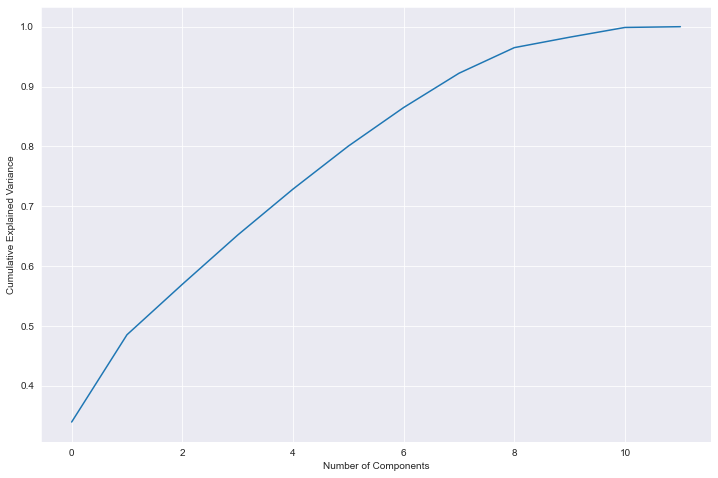

In [206]:
#Plotting the scree plot
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [207]:
#Understanding how the original 9 variables are loaded on the principal components.
colnames = list(X_train[num_vars].columns)
X_train_pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4],'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7]})
X_train_pcs_df

Feature       PC1       PC2       PC3       PC4  \
0                                id  0.000937  0.097845  0.853349  0.349667   
1                               aon  0.131809  0.102473  0.298915 -0.834569   
2                 churn_probability -0.260001  0.163703 -0.212214  0.313044   
3              days_since_last_rech -0.254610  0.558714  0.060333 -0.029020   
4             rech_diff_act_good_ph  0.228664 -0.576973 -0.050984  0.054399   
5         rech_amt_diff_act_good_ph  0.422947  0.071310  0.047493  0.146019   
6        onnet_mou_diff_act_good_ph  0.295448  0.278739 -0.219817  0.096602   
7       offnet_mou_diff_act_good_ph  0.333035  0.217314  0.065949  0.073824   
8     total_og_mou_diff_act_good_ph  0.409933  0.334250 -0.108587  0.114120   
9     total_ic_mou_diff_act_good_ph  0.259141 -0.034606 -0.039215 -0.010377   
10  total_rech_num_diff_act_good_ph  0.351389  0.128574 -0.127172 -0.075980   
11    max_rech_amt_diff_act_good_ph  0.249305 -0.220479  0.216207  0.156277   

         PC5       PC6       PC7       PC8  
0  -0.347574 -0.093933  0.038061  0.083236  
1   0.052146 -0.105409  0.193594  0.361424  
2   0.071857  0.038869  0.411560  0.750770  
3   0.203615  0.059272 -0.210555 -0.055453  
4  -0.213459 -0.018756  0.220648  0.141732  
5   0.294116 -0.064927  0.012643  0.027209  
6  -0.206808 -0.636744 -0.155030  0.117103  
7   0.120964  0.576970  0.358096 -0.138421  
8  -0.066035 -0.006161  0.128699 -0.003612  
9  -0.195468  0.441275 -0.694924  0.459455  
10 -0.267331  0.009158  0.169244 -0.130719  
11  0.725496 -0.193110 -0.134608  0.117526

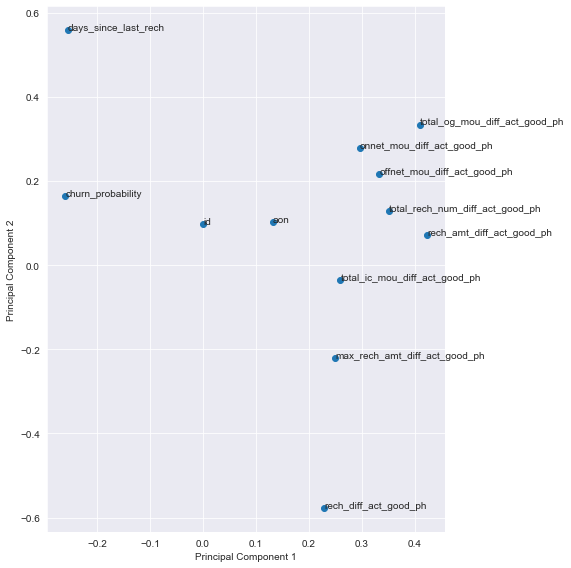

In [208]:
# Let's do a scatter plot using the top two PCs to visualise how these features are loaded
fig = plt.figure(figsize = (8,8))
plt.scatter(X_train_pcs_df.PC1, X_train_pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(X_train_pcs_df.Feature):
    plt.annotate(txt, (X_train_pcs_df.PC1[i],X_train_pcs_df.PC2[i]))
plt.tight_layout()

In [209]:
#Lets now do dimenstionality reduction using the five Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=8)

In [210]:
# Create the PCA data from the Scaled numerical variables of the country dataframe 
pca_df = pca_final.fit_transform(X_train[num_vars])
pca_df.shape

(27692, 8)

In [211]:
# Create a transpose so that the each column is properly arranged
pca_dft = np.transpose(pca_df)

In [212]:
# Creating the dataframe from the Principal Component values and assign column names
X_train_pca = pd.DataFrame({'PC1':pca_dft[0],'PC2':pca_dft[1],'PC3':pca_dft[2],'PC4':pca_dft[3],'PC5':pca_dft[4],'PC6':pca_dft[5],'PC7':pca_dft[6],'PC8':pca_dft[7]})

In [213]:
# Check data count
X_train_pca.shape

(27692, 8)

In [214]:
# Check data count
X_train_pca.describe()

PC1           PC2           PC3           PC4           PC5  \
count  2.769200e+04  2.769200e+04  2.769200e+04  2.769200e+04  2.769200e+04   
mean   4.763010e-15 -2.298064e-16 -7.929363e-17  3.481174e-16 -8.002330e-17   
std    2.017642e+00  1.322800e+00  1.003985e+00  9.894188e-01  9.597988e-01   
min   -1.418655e+01 -1.446691e+01 -4.318601e+00 -6.080528e+00 -1.077764e+01   
25%   -1.317077e+00 -2.973733e-01 -8.381976e-01 -6.989128e-01 -4.338268e-01   
50%   -5.834130e-02  1.928835e-01  1.962652e-02 -2.651850e-01  3.209746e-02   
75%    1.507792e+00  6.688381e-01  8.319404e-01  4.506885e-01  4.918884e-01   
max    2.755154e+01  8.307638e+00  6.513710e+00  5.338457e+00  2.321293e+01   

                PC6           PC7           PC8  
count  2.769200e+04  2.769200e+04  2.769200e+04  
mean  -4.055048e-16  6.201405e-17  8.562312e-17  
std    9.283832e-01  8.689464e-01  7.201262e-01  
min   -1.632995e+01 -1.450519e+01 -9.970878e+00  
25%   -4.390961e-01 -3.334677e-01 -3.588395e-01  
50%    1.654117e-02  5.153679e-03  7.291616e-03  
75%    4.504332e-01  3.572368e-01  3.935878e-01  
max    1.441593e+01  1.259908e+01  1.035113e+01

### <font color = blue> Validate data Principal components </font>

In [215]:
y_Validation=y_Validation.tolist()
X_Validation[num_vars] = scaler.transform(X_Validation[num_vars])
pcs_df_test=pca_final.transform(X_Validation[num_vars])
pca_df_test_t = np.transpose(pcs_df_test)
# Create a dataframe from the Principal Component values and assign column names
X_validation_pca = pd.DataFrame({'PC1':pca_df_test_t[0],'PC2':pca_df_test_t[1],'PC3':pca_df_test_t[2],'PC4':pca_df_test_t[3],'PC5':pca_df_test_t[4],'PC6':pca_df_test_t[5],'PC7':pca_df_test_t[6],'PC8':pca_df_test_t[7]})

## Part 4. Tree models, Random Forest & Boosting models using PCA data

In [216]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

### <font color = blue> Decision Tree CLassifier </font>

In [217]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 20, 5),
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(50, 200, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search_dt.fit(X_train_pca,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 20, 5),
                         'min_samples_leaf': range(50, 200, 50),
                         'min_samples_split': range(50, 200, 50)},
             verbose=1)

In [218]:
# cv results
dt_cv_results = pd.DataFrame(grid_search_dt.cv_results_)
dt_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.146904      0.011400         0.002805    4.059289e-04   
1        0.131250      0.002791         0.002992    8.869684e-07   
2        0.133516      0.002441         0.002598    4.936910e-04   
3        0.133364      0.004618         0.002203    3.996899e-04   
4        0.137375      0.004555         0.002202    3.977446e-04   
5        0.139062      0.001709         0.002586    4.842646e-04   
6        0.131302      0.004160         0.002398    4.863217e-04   
7        0.129969      0.003234         0.002390    4.803163e-04   
8        0.132297      0.002953         0.002403    4.806009e-04   
9        0.212241      0.006241         0.002401    4.836553e-04   
10       0.213696      0.002870         0.002599    4.813513e-04   
11       0.210416      0.005535         0.002203    3.941593e-04   
12       0.198880      0.002714         0.002402    4.968192e-04   
13       0.202174      0.002787         0.002595    4.873000e-04   
14       0.198778      0.003669         0.002784    3.928930e-04   
15       0.189761      0.002067         0.002595    4.883958e-04   
16       0.189781      0.003686         0.002603    4.928430e-04   
17       0.193599      0.004633         0.002600    4.946726e-04   
18       0.242246      0.005765         0.002988    6.488140e-06   
19       0.240446      0.004370         0.002602    4.915376e-04   
20       0.242546      0.006337         0.002784    4.210503e-04   
21       0.231715      0.010390         0.002196    3.983330e-04   
22       0.220628      0.006472         0.002981    1.658749e-05   
23       0.218347      0.001960         0.002787    3.957055e-04   
24       0.198596      0.003825         0.002786    3.975186e-04   
25       0.197648      0.001972         0.002210    4.097134e-04   
26       0.196478      0.003524         0.002792    3.964164e-04   
27       0.083655      0.000882         0.002199    3.981108e-04   
28       0.084369      0.002144         0.002394    4.892597e-04   
29       0.083665      0.000687         0.002388    4.949923e-04   
30       0.082171      0.001874         0.002402    4.833819e-04   
31       0.084450      0.002063         0.002206    4.069485e-04   
32       0.083227      0.000378         0.002193    3.866439e-04   
33       0.083852      0.002198         0.002318    4.047430e-04   
34       0.086802      0.004379         0.002433    4.957860e-04   
35       0.082779      0.000885         0.002194    3.808202e-04   
36       0.143602      0.002433         0.002202    3.940829e-04   
37       0.142235      0.001611         0.002380    5.031413e-04   
38       0.144004      0.004782         0.002585    4.979272e-04   
39       0.140031      0.002705         0.002695    4.074218e-04   
40       0.136520      0.001115         0.002605    4.854527e-04   
41       0.135425      0.001133         0.001993    1.600071e-06   
42       0.127605      0.001086         0.002403    4.846262e-04   
43       0.132893      0.005439         0.002800    7.403065e-04   
44       0.136828      0.003321         0.002205    3.940771e-04   
45       0.180610      0.003779         0.002801    4.036879e-04   
46       0.173613      0.002930         0.002194    3.984973e-04   
47       0.166432      0.002409         0.003492    1.559977e-03   
48       0.155391      0.001505         0.002187    3.851371e-04   
49       0.152776      0.003112         0.002602    4.899415e-04   
50       0.161799      0.007444         0.002601    4.801240e-04   
51       0.143824      0.002719         0.002793    3.987077e-04   
52       0.141770      0.003043         0.002580    4.908055e-04   
53       0.145443      0.004830         0.002385    4.923693e-04   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               5                     50   
1          entropy               5                     50   
2          entropy               5                     50   
3          entropy 

In [219]:
# print optimal accuracy score and hyperparameters
print("best accuracy", grid_search_dt.best_score_)
print(grid_search_dt.best_estimator_)

best accuracy 0.9081686111502852
DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=50)


In [220]:
# model with optimal hyperparameters
dt_optimal = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = None,
                                  max_depth=15, 
                                  min_samples_leaf=50,
                                  min_samples_split=50, splitter='best')
dt_optimal.fit(X_train_pca, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=50,
                       min_samples_split=50)

In [221]:
# accuracy score
dt_optimal.score(X_validation_pca,y_Validation)

0.8926419283222328

In [222]:
# Make predictions
y_pred_dt_optimal = dt_optimal.predict(X_validation_pca)
y_train_pred_dt_optimal = dt_optimal.predict(X_train_pca)

# confusion matrix
print(confusion_matrix(y_Validation,y_pred_dt_optimal))
print(accuracy_score(y_Validation,y_pred_dt_optimal))
print(recall_score(y_Validation,y_pred_dt_optimal))
# score
#print(clf_gini.score(X_validation_pca,y_Validation))


# confusion matrix
print(confusion_matrix(y_train,y_train_pred_dt_optimal))
print(accuracy_score(y_train,y_train_pred_dt_optimal))
print(recall_score(y_train,y_train_pred_dt_optimal))
# score
#print(clf_gini.score(X_train_pca,y_train))

[[5319  641]
 [  36  310]]
0.8926419283222328
0.8959537572254336
[[12411  1435]
 [  832 13014]]
0.9181352015022389
0.9399104434493717


## <font color = blue> Part 5. Random Forest Model </font>

In [223]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [224]:
# Fit the grid search to the data
grid_search_rf.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': [8],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [225]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search_rf.best_score_,'using',grid_search_rf.best_params_)

We can get accuracy of 0.9048101418747786 using {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [226]:
# model with the best hyperparameters

rfc_optimal = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=100)

In [227]:
# fit
rfc_optimal.fit(X_train_pca,y_train)

RandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=100,
                       min_samples_split=200)

In [228]:
# predict
rfc_test_predictions = rfc_optimal.predict(X_validation_pca)

In [229]:
print(confusion_matrix(y_Validation,rfc_test_predictions))
print(accuracy_score(y_Validation,rfc_test_predictions))
print(precision_score(y_Validation,rfc_test_predictions))
print(recall_score(y_Validation,rfc_test_predictions))

[[5286  674]
 [  29  317]]
0.8885188709165873
0.31987891019172554
0.9161849710982659


In [230]:
# predict
rfc_train_predictions = rfc_optimal.predict(X_train_pca)

In [231]:
print(confusion_matrix(y_train,rfc_train_predictions))
print(accuracy_score(y_train,rfc_train_predictions))
print(precision_score(y_train,rfc_train_predictions))
print(recall_score(y_train,rfc_train_predictions))

[[12216  1630]
 [  809 13037]]
0.9119240213780153
0.8888661621326788
0.941571573017478


## Part 6. Adaboost Classifier

In [232]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [2, 5],
              "n_estimators": [200, 400, 600]
             }

In [233]:
# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME")

In [234]:
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1,n_jobs=-1)

In [235]:
grid_search_ABC.fit(X_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(),
                                          learning_rate=0.6),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [2, 5],
                         'n_estimators': [200, 400, 600]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [236]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      12.671241      0.204512         0.219386        0.003304   
1      25.738581      0.179703         0.443255        0.025634   
2      39.620488      0.863028         0.488688        0.027377   
3      30.867790      0.635728         0.243791        0.006953   
4      52.392231      0.294747         0.308967        0.015110   
5      63.394444      0.185396         0.350727        0.001142   

  param_base_estimator__max_depth param_n_estimators  \
0                               2                200   
1                               2                400   
2                               2                600   
3                               5                200   
4                               5                400   
5                               5                600   

                                              params  split0_test_score  \
0  {'base_estimator__max_depth': 2, 'n_estimators...           0.961150   
1  {'base_estimator__max_depth': 2, 'n_estimators...           0.963022   
2  {'base_estimator__max_depth': 2, 'n_estimators...           0.963454   
3  {'base_estimator__max_depth': 5, 'n_estimators...           0.969587   
4  {'base_estimator__max_depth': 5, 'n_estimators...           0.974468   
5  {'base_estimator__max_depth': 5, 'n_estimators...           0.975010   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.961104           0.961738         0.961330        0.000289   
1           0.962869           0.963339         0.963076        0.000196   
2           0.964471           0.963781         0.963902        0.000424   
3           0.972875           0.971633         0.971365        0.001356   
4           0.973676           0.973493         0.973879        0.000423   
5           0.976645           0.973421         0.975025        0.001316   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.968017            0.965583   
1                5            0.970767            0.967608   
2                4            0.971198            0.969594   
3                3            0.987281            0.989451   
4                2            0.995120            0.991601   
5                1            0.997049            0.996434   

   split2_train_score  mean_train_score  std_train_score  
0            0.967192          0.966931         0.001011  
1            0.969315          0.969230         0.001291  
2            0.969948          0.970247         0.000688  
3            0.989159          0.988630         0.000961  
4            0.994608          0.993776         0.001552  
5            0.994939          0.996140         0.000886

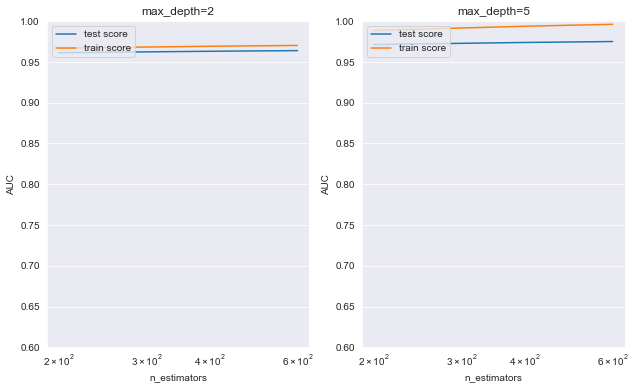

In [237]:
# plot AUC with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [238]:
# model performance on validation data with chosen hyperparameters

# base estimator
tree = DecisionTreeClassifier(max_depth=5)

# adaboost with the tree as base estimator
# learning rate is arbitrarily set, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.2,
    n_estimators=200,
    algorithm="SAMME")

ABC.fit(X_train_pca, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.2, n_estimators=200)

In [239]:
# predict on validation data
abc_validation_predictions = ABC.predict(X_validation_pca)

In [240]:
print(confusion_matrix(y_Validation,abc_validation_predictions))
print(accuracy_score(y_Validation,abc_validation_predictions))
print(precision_score(y_Validation,abc_validation_predictions))
print(recall_score(y_Validation,abc_validation_predictions))

[[5406  554]
 [  32  314]]
0.9070726292419917
0.3617511520737327
0.9075144508670521


In [241]:
# predict on train data
abc_train_predictions = ABC.predict(X_train_pca)

In [242]:
print(confusion_matrix(y_train,abc_train_predictions))
print(accuracy_score(y_train,abc_train_predictions))
print(precision_score(y_train,abc_train_predictions))
print(recall_score(y_train,abc_train_predictions))

[[12553  1293]
 [  640 13206]]
0.9301964466271847
0.9108214359611008
0.9537772641918244


## <font color = blue> Part 7. XGBoost Classifier </font>

In [243]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=5, n_estimators=200)

# set up GridSearchCV()
xgb_model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True, n_jobs = -1)

In [244]:
# fit the model
xgb_model_cv.fit(X_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[17:39:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=5, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [245]:
# cv results
xgb_cv_results = pd.DataFrame(xgb_model_cv.cv_results_)
xgb_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       9.810631      0.117708         0.025172        0.001826   
1      10.171491      0.154145         0.023317        0.000953   
2      10.188503      0.046293         0.028002        0.001622   
3       9.715842      0.109101         0.024678        0.000483   
4       6.692245      0.107992         0.035572        0.017280   
5       6.428317      0.169877         0.026263        0.007114   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.976461   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.977775   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.978612   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.970514   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.975854   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.978346   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.977456           0.977710         0.977209        0.000539   
1           0.979479           0.978945         0.978733        0.000712   
2           0.980384           0.979335         0.979443        0.000727   
3           0.972618           0.970739         0.971290        0.000943   
4           0.979306           0.976449         0.977203        0.001507   
5           0.979845           0.979109         0.979100        0.000612   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.997602            0.997575   
1                3            0.998740            0.999091   
2                1            0.998841            0.999001   
3                6            0.999649            0.999741   
4                5            1.000000            1.000000   
5                2            1.000000            1.000000   

   split2_train_score  mean_train_score  std_train_score  
0            0.997627          0.997601     2.137503e-05  
1            0.998770          0.998867     1.586315e-04  
2            0.999077          0.998973     9.807361e-05  
3            0.999556          0.999649     7.581612e-05  
4            1.000000          1.000000     5.532779e-09  
5            1.000000          1.000000     0.000000e+00

In [246]:
# convert parameters to int for plotting on x-axis
xgb_cv_results['param_learning_rate'] = xgb_cv_results['param_learning_rate'].astype('float')
xgb_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       9.810631      0.117708         0.025172        0.001826   
1      10.171491      0.154145         0.023317        0.000953   
2      10.188503      0.046293         0.028002        0.001622   
3       9.715842      0.109101         0.024678        0.000483   
4       6.692245      0.107992         0.035572        0.017280   

   param_learning_rate param_subsample  \
0                  0.2             0.3   
1                  0.2             0.6   
2                  0.2             0.9   
3                  0.6             0.3   
4                  0.6             0.6   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.976461   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.977775   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.978612   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.970514   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.975854   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.977456           0.977710         0.977209        0.000539   
1           0.979479           0.978945         0.978733        0.000712   
2           0.980384           0.979335         0.979443        0.000727   
3           0.972618           0.970739         0.971290        0.000943   
4           0.979306           0.976449         0.977203        0.001507   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.997602            0.997575   
1                3            0.998740            0.999091   
2                1            0.998841            0.999001   
3                6            0.999649            0.999741   
4                5            1.000000            1.000000   

   split2_train_score  mean_train_score  std_train_score  
0            0.997627          0.997601     2.137503e-05  
1            0.998770          0.998867     1.586315e-04  
2            0.999077          0.998973     9.807361e-05  
3            0.999556          0.999649     7.581612e-05  
4            1.000000          1.000000     5.532779e-09

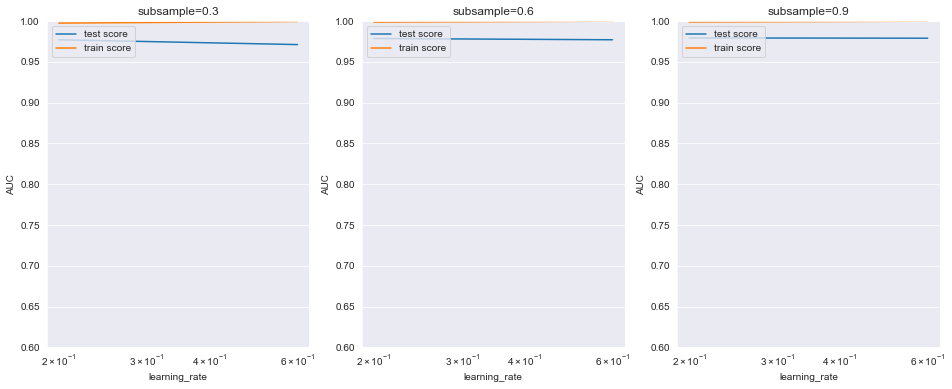

In [247]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = xgb_cv_results[xgb_cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [248]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.6,
          'max_depth': 5, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_model_optimal = XGBClassifier(params = params)
xgb_model_optimal.fit(X_train_pca, y_train)

[17:39:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:39:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 5, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [249]:
# predict
xgb_validation_predictions = xgb_model_optimal.predict(X_validation_pca)

print(confusion_matrix(y_Validation,xgb_validation_predictions))
print(accuracy_score(y_Validation,xgb_validation_predictions))
print(precision_score(y_Validation,xgb_validation_predictions))
print(recall_score(y_Validation,xgb_validation_predictions))

[[5537  423]
 [  50  296]]
0.9249920710434507
0.41168289290681503
0.8554913294797688


In [250]:
# predict
xgb_train_predictions = xgb_model_optimal.predict(X_train_pca)

print(confusion_matrix(y_train,xgb_train_predictions))
print(accuracy_score(y_train,xgb_train_predictions))
print(precision_score(y_train,xgb_train_predictions))
print(recall_score(y_train,xgb_train_predictions))

[[13396   450]
 [   89 13757]]
0.9805358948432761
0.9683254733582037
0.9935721508016756


## <font color = blue> Part 8. Logistic Regression </font>

In [251]:
# Logistic Regression Model
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                27692
Model:                            GLM   Df Residuals:                    27679
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8286.0
Date:                Wed, 18 Jan 2023   Deviance:                       16572.
Time:                        17:39:30   Pearson chi2:                 1.29e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5452
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.1424      0.022      6.474      0.000       0.099       0.186
id                                 -0.0329      0.020     -1.643      0.100      -0.072       0.006
aon                                -0.3421      0.022    -15.506      0.000      -0.385      -0.299
churn_probability                   1.0169      0.024     42.404      0.000       0.970       1.064
days_since_last_rech                0.5111      0.039     13.196      0.000       0.435       0.587
rech_diff_act_good_ph              -0.0970      0.041     -2.379      0.017      -0.177      -0.017
rech_amt_diff_act_good_ph          -0.0306      0.053     -0.575      0.565      -0.135       0.074
onnet_mou_diff_act_good_ph         -0.2975      0.085     -3.487      0.000      -0.465      -0.130
offnet_mou_diff_act_good_ph        -0.1199      0.090     -1.329      0.184      -0.297       0.057
total_og_mou_diff_act_good_ph      -1.0677      0.123     -8.691      0.000      -1.308      -0.827
total_ic_mou_diff_act_good_ph      -0.4397      0.028    -15.563      0.000      -0.495      -0.384
total_rech_num_diff_act_good_ph    -0.7424      0.036    -20.814      0.000      -0.812      -0.672
max_rech_amt_diff_act_good_ph      -0.8524      0.034    -25.060      0.000      -0.919      -0.786
===================================================================================================
"""

In [252]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

Features    VIF
8     total_og_mou_diff_act_good_ph  34.33
7       offnet_mou_diff_act_good_ph  17.46
6        onnet_mou_diff_act_good_ph  15.90
5         rech_amt_diff_act_good_ph   3.63
3              days_since_last_rech   2.92
4             rech_diff_act_good_ph   2.77
10  total_rech_num_diff_act_good_ph   1.83
11    max_rech_amt_diff_act_good_ph   1.83
2                 churn_probability   1.28
9     total_ic_mou_diff_act_good_ph   1.25
1                               aon   1.07
0                                id   1.01

In [253]:
col = X_train.columns
col=col.drop('offnet_mou_diff_act_good_ph',1)

col

Index(['id', 'aon', 'churn_probability', 'days_since_last_rech',
       'rech_diff_act_good_ph', 'rech_amt_diff_act_good_ph',
       'onnet_mou_diff_act_good_ph', 'total_og_mou_diff_act_good_ph',
       'total_ic_mou_diff_act_good_ph', 'total_rech_num_diff_act_good_ph',
       'max_rech_amt_diff_act_good_ph'],
      dtype='object')

In [254]:
# Logistic Regression Model
logm2=sm.GLM(y_train,(sm.add_constant(X_train[col])),family=sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                27692
Model:                            GLM   Df Residuals:                    27680
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8286.9
Date:                Wed, 18 Jan 2023   Deviance:                       16574.
Time:                        17:39:30   Pearson chi2:                 1.32e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5452
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.1409      0.022      6.415      0.000       0.098       0.184
id                                 -0.0343      0.020     -1.713      0.087      -0.074       0.005
aon                                -0.3445      0.022    -15.659      0.000      -0.388      -0.301
churn_probability                   1.0173      0.024     42.478      0.000       0.970       1.064
days_since_last_rech                0.5120      0.039     13.207      0.000       0.436       0.588
rech_diff_act_good_ph              -0.0965      0.041     -2.366      0.018      -0.176      -0.017
rech_amt_diff_act_good_ph          -0.0565      0.050     -1.129      0.259      -0.155       0.042
onnet_mou_diff_act_good_ph         -0.1986      0.040     -4.933      0.000      -0.277      -0.120
total_og_mou_diff_act_good_ph      -1.2168      0.049    -25.057      0.000      -1.312      -1.122
total_ic_mou_diff_act_good_ph      -0.4366      0.028    -15.522      0.000      -0.492      -0.381
total_rech_num_diff_act_good_ph    -0.7406      0.036    -20.749      0.000      -0.811      -0.671
max_rech_amt_diff_act_good_ph      -0.8477      0.034    -24.969      0.000      -0.914      -0.781
===================================================================================================
"""

In [255]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

Features   VIF
5         rech_amt_diff_act_good_ph  3.37
7     total_og_mou_diff_act_good_ph  3.35
3              days_since_last_rech  2.92
4             rech_diff_act_good_ph  2.77
6        onnet_mou_diff_act_good_ph  2.17
9   total_rech_num_diff_act_good_ph  1.83
10    max_rech_amt_diff_act_good_ph  1.82
2                 churn_probability  1.27
8     total_ic_mou_diff_act_good_ph  1.24
1                               aon  1.07
0                                id  1.01

In [256]:
col=col.drop('onnet_mou_diff_act_good_ph',1)

col

Index(['id', 'aon', 'churn_probability', 'days_since_last_rech',
       'rech_diff_act_good_ph', 'rech_amt_diff_act_good_ph',
       'total_og_mou_diff_act_good_ph', 'total_ic_mou_diff_act_good_ph',
       'total_rech_num_diff_act_good_ph', 'max_rech_amt_diff_act_good_ph'],
      dtype='object')

In [257]:
# Logistic Regression Model
X_train_sm = sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
logreg_model=logm3.fit()
logreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                27692
Model:                            GLM   Df Residuals:                    27681
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8299.3
Date:                Wed, 18 Jan 2023   Deviance:                       16599.
Time:                        17:39:31   Pearson chi2:                 1.75e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5447
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.1379      0.022      6.289      0.000       0.095       0.181
id                                 -0.0330      0.020     -1.648      0.099      -0.072       0.006
aon                                -0.3406      0.022    -15.522      0.000      -0.384      -0.298
churn_probability                   1.0186      0.024     42.607      0.000       0.972       1.065
days_since_last_rech                0.5171      0.039     13.325      0.000       0.441       0.593
rech_diff_act_good_ph              -0.0940      0.041     -2.304      0.021      -0.174      -0.014
rech_amt_diff_act_good_ph          -0.0690      0.050     -1.382      0.167      -0.167       0.029
total_og_mou_diff_act_good_ph      -1.3511      0.041    -33.034      0.000      -1.431      -1.271
total_ic_mou_diff_act_good_ph      -0.4256      0.028    -15.200      0.000      -0.481      -0.371
total_rech_num_diff_act_good_ph    -0.7453      0.036    -20.863      0.000      -0.815      -0.675
max_rech_amt_diff_act_good_ph      -0.8448      0.034    -24.854      0.000      -0.911      -0.778
===================================================================================================
"""

In [258]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

Features   VIF
5        rech_amt_diff_act_good_ph  3.37
3             days_since_last_rech  2.92
4            rech_diff_act_good_ph  2.77
6    total_og_mou_diff_act_good_ph  2.18
8  total_rech_num_diff_act_good_ph  1.83
9    max_rech_amt_diff_act_good_ph  1.82
2                churn_probability  1.27
7    total_ic_mou_diff_act_good_ph  1.23
1                              aon  1.07
0                               id  1.01

In [259]:
y_logm_train_pred = logreg_model.predict(X_train_sm).values.reshape(-1)

In [260]:
y_logm_train_pred[:10]

array([0.03921752, 0.13122929, 0.15769693, 0.06429647, 0.03474468,
       0.07299465, 0.07599292, 0.02842539, 0.65630371, 0.04419838])

In [261]:
y_logm_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_logm_train_pred})
y_logm_train_pred_final.head()

Churn  Churn_Prob
0      0    0.039218
1      0    0.131229
2      0    0.157697
3      0    0.064296
4      0    0.034745

In [262]:
y_logm_train_pred_final['Churn_predicted'] = y_logm_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_logm_train_pred_final['Churn_Prob%'] = y_logm_train_pred_final.Churn_Prob.map(lambda x: round(x*100,2))

# Let's see the head
y_logm_train_pred_final.head()

Churn  Churn_Prob  Churn_predicted  Churn_Prob%
0      0    0.039218                0         3.92
1      0    0.131229                0        13.12
2      0    0.157697                0        15.77
3      0    0.064296                0         6.43
4      0    0.034745                0         3.47

In [263]:
# Confusion Matrix
logm_confusion = metrics.confusion_matrix(y_logm_train_pred_final.Churn,y_logm_train_pred_final.Churn_predicted)
print(logm_confusion)

[[12287  1559]
 [ 1411 12435]]


In [264]:
# Let's check overall accuracy.
print(metrics.accuracy_score(y_logm_train_pred_final.Churn,y_logm_train_pred_final.Churn_predicted))

0.8927488083200924


In [265]:
TN=logm_confusion[0,0]
FP=logm_confusion[0,1]
FN=logm_confusion[1,0]
TP=logm_confusion[1,1]

In [266]:
# SENSITIVITY
print("Sensitivity:",round(100*(TP/float(FN+TP)),2),"%")

Sensitivity: 89.81 %


In [267]:
# SPECIFICITY
print("Specificity:",round(100*(TN/float(TN+FP)),2),"%")

Specificity: 88.74 %


In [268]:
# FALSE POSITIVE RATE
print("FPR:",round(100*(FP/float(FP+TN)),2),"%")

FPR: 11.26 %


In [269]:
# FALSE NEGATIVE RATE
print("FPR:",round(100*(FN/float(FN+TP)),2),"%")

FPR: 10.19 %


In [270]:
# positive predictive value
print("Positive Predictive Power:",round(100*(TP/float(TP+FP)),2),"%")

Positive Predictive Power: 88.86 %


In [271]:
# negative predictive value
print("Negative Predictive Power:",round(100*(TN/float(TN+FN)),2),"%")

Negative Predictive Power: 89.7 %


In [272]:
# ACCURACY SCORE
print("ACCURACY SCORE:",round(100*((TP+TN)/(TP+TN+FP+FN)),2),"%")

ACCURACY SCORE: 89.27 %


In [273]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [274]:
fpr, tpr, thresholds = metrics.roc_curve( y_logm_train_pred_final.Churn, y_logm_train_pred_final.Churn_Prob, drop_intermediate = False )

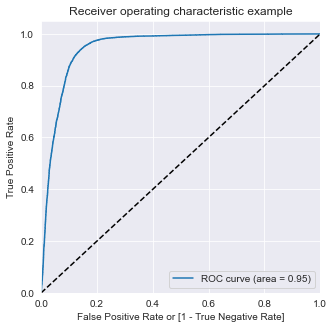

In [275]:
draw_roc(y_logm_train_pred_final.Churn, y_logm_train_pred_final.Churn_Prob)

In [276]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
numbers.append(0.45)
for i in numbers:
    y_logm_train_pred_final[i]= y_logm_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_logm_train_pred_final.head()

Churn  Churn_Prob  Churn_predicted  Churn_Prob%  0.0  0.1  0.2  0.3  0.4  \
0      0    0.039218                0         3.92    1    0    0    0    0   
1      0    0.131229                0        13.12    1    1    0    0    0   
2      0    0.157697                0        15.77    1    1    0    0    0   
3      0    0.064296                0         6.43    1    0    0    0    0   
4      0    0.034745                0         3.47    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  0.45  
0    0    0    0    0    0     0  
1    0    0    0    0    0     0  
2    0    0    0    0    0     0  
3    0    0    0    0    0     0  
4    0    0    0    0    0     0

In [277]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.45,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_logm_train_pred_final.Churn, y_logm_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.500000  1.000000  0.000000
0.10  0.10  0.795753  0.992272  0.599234
0.20  0.20  0.875596  0.983244  0.767947
0.30  0.30  0.895566  0.962155  0.828976
0.40  0.40  0.898852  0.935216  0.862487
0.45  0.45  0.897407  0.918532  0.876282
0.50  0.50  0.892749  0.898093  0.887404
0.60  0.60  0.876318  0.844865  0.907771
0.70  0.70  0.848729  0.774881  0.922577
0.80  0.80  0.812112  0.683808  0.940416
0.90  0.90  0.758486  0.555901  0.961072


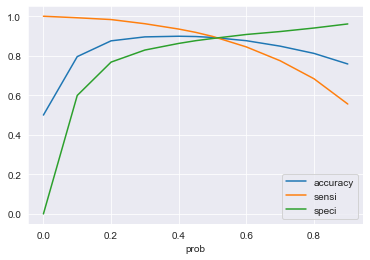

In [278]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [279]:
y_logm_train_pred_final['Churn_final_predicted'] = y_logm_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_logm_train_pred_final.head()

Churn  Churn_Prob  Churn_predicted  Churn_Prob%  0.0  0.1  0.2  0.3  0.4  \
0      0    0.039218                0         3.92    1    0    0    0    0   
1      0    0.131229                0        13.12    1    1    0    0    0   
2      0    0.157697                0        15.77    1    1    0    0    0   
3      0    0.064296                0         6.43    1    0    0    0    0   
4      0    0.034745                0         3.47    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  0.45  Churn_final_predicted  
0    0    0    0    0    0     0                      0  
1    0    0    0    0    0     0                      0  
2    0    0    0    0    0     0                      0  
3    0    0    0    0    0     0                      0  
4    0    0    0    0    0     0                      0

In [280]:
print("Precision Score of the Model:",round(100*(precision_score(y_logm_train_pred_final.Churn, y_logm_train_pred_final.Churn_final_predicted)),2),"%")

Precision Score of the Model: 88.86 %


In [281]:
print("Recall Score of the Model:",round(100*(recall_score(y_logm_train_pred_final.Churn, y_logm_train_pred_final.Churn_final_predicted)),2),"%")

Recall Score of the Model: 89.81 %


In [282]:
p, r, thresholds = precision_recall_curve(y_logm_train_pred_final.Churn, y_logm_train_pred_final.Churn_Prob)

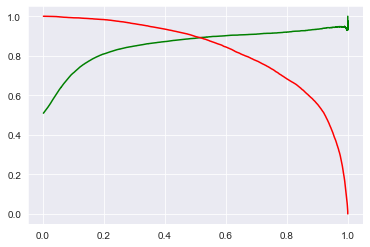

In [283]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [284]:
X_Validation = X_Validation[col]
X_Validation.head()

id       aon  churn_probability  days_since_last_rech  \
24630 -0.519231 -0.914429           -0.64557             -0.663034   
24154 -0.542949 -0.763388           -0.64557             -0.663034   
58592  1.173023  2.146212           -0.64557             -0.005335   
67551  1.619431 -0.997561           -0.64557             -0.580821   
55046  0.996333  2.153237           -0.64557             -0.334184   

       rech_diff_act_good_ph  rech_amt_diff_act_good_ph  \
24630               0.345906                   0.618494   
24154               0.345906                   0.655738   
58592               0.345906                   0.287680   
67551               0.345906                  -0.298365   
55046               0.345906                   0.464041   

       total_og_mou_diff_act_good_ph  total_ic_mou_diff_act_good_ph  \
24630                       0.601050                       0.556453   
24154                       0.400498                       0.576921   
58592                       0.604366                       0.185986   
67551                       0.083449                      -0.134792   
55046                       0.448426                      -9.848423   

       total_rech_num_diff_act_good_ph  max_rech_amt_diff_act_good_ph  
24630                         1.564793                      -0.131809  
24154                         0.166101                       0.575748  
58592                         0.293255                       0.650792  
67551                        -0.851130                       0.146925  
55046                         0.229678                       0.504278

In [285]:
X_validation_sm = sm.add_constant(X_Validation)


In [286]:
y_logm_validation_pred = logreg_model.predict(X_validation_sm)

In [287]:
y_logm_validation_pred[:10]

24630    0.062211
24154    0.113121
58592    0.047041
67551    0.477329
55046    0.812368
13221    0.010587
52599    0.044958
68079    0.991770
17574    0.981781
12037    0.992555
dtype: float64

In [288]:
y_logm_validation_pred_final = pd.DataFrame({'Churn':y_Validation, 'Churn_Prob':y_logm_validation_pred})
y_logm_validation_pred_final.head()

Churn  Churn_Prob
24630      0    0.062211
24154      0    0.113121
58592      0    0.047041
67551      0    0.477329
55046      0    0.812368

In [289]:
y_logm_validation_pred_final['Churn_predicted'] = y_logm_validation_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_logm_validation_pred_final.head()

Churn  Churn_Prob  Churn_predicted
24630      0    0.062211                0
24154      0    0.113121                0
58592      0    0.047041                0
67551      0    0.477329                0
55046      0    0.812368                1

In [290]:
# Confusion Matrix
logm_test_confusion = metrics.confusion_matrix(y_logm_validation_pred_final.Churn,y_logm_validation_pred_final.Churn_predicted)
print(logm_test_confusion)

[[5312  648]
 [  31  315]]


In [291]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_logm_validation_pred_final.Churn,y_logm_validation_pred_final.Churn_predicted))

0.8923247700602601


In [292]:
TN=logm_test_confusion[0,0]
FP=logm_test_confusion[0,1]
FN=logm_test_confusion[1,0]
TP=logm_test_confusion[1,1]

In [293]:
# SENSITIVITY
print("Sensitivity:",round(100*(TP/float(FN+TP)),2),"%")

Sensitivity: 91.04 %


In [294]:
# SPECIFICITY
print("Specificity:",round(100*(TN/float(TN+FP)),2),"%")

Specificity: 89.13 %


In [295]:
# FALSE POSITIVE RATE
print("FPR:",round(100*(FP/float(FP+TN)),2),"%")

FPR: 10.87 %


In [296]:
# FALSE NEGATIVE RATE
print("FPR:",round(100*(FN/float(FN+TP)),2),"%")

FPR: 8.96 %


In [297]:
# positive predictive value
print("Positive Predictive Power:",round(100*(TP/float(TP+FP)),2),"%")

Positive Predictive Power: 32.71 %


In [298]:
# negative predictive value
print("Negative Predictive Power:",round(100*(TN/float(TN+FN)),2),"%")

Negative Predictive Power: 99.42 %


In [299]:
# ACCURACY SCORE
print("ACCURACY SCORE:",round(100*((TP+TN)/(TP+TN+FP+FN)),2),"%")

ACCURACY SCORE: 89.23 %


In [300]:
print("Precision Score of the Test Data Predictions:",round(100*(precision_score(y_logm_validation_pred_final.Churn, y_logm_validation_pred_final.Churn_predicted)),2),"%")

Precision Score of the Test Data Predictions: 32.71 %


In [301]:
print("Recall Score of the Test Data Predictions:",round(100*(recall_score(y_logm_validation_pred_final.Churn, y_logm_validation_pred_final.Churn_predicted)),2),"%")

Recall Score of the Test Data Predictions: 91.04 %


In [302]:
print("Accuracy Score of the Test Data Predictions:",round(100*(accuracy_score(y_logm_validation_pred_final.Churn, y_logm_validation_pred_final.Churn_predicted)),2),"%")

Accuracy Score of the Test Data Predictions: 89.23 %


# <font color = blue> CONCLUSION: With following predictors, we have achieved scores as given above </font>
- Positive Predictors for CHURN
- - days_since_last_rech: If the customer has NOT done any recharge for a long time, then he is a positive candidate for CHURN
- - rech_diff_act_good_ph: If the customer has shown an sudden difference in RECHARGE activity - different from good phase, then he might be a Churn customer.

- Negative Predictors for HOT LEADS
- - max_rech_amt_diff_act_good_ph: If there is huge dip in max amount spent for recharges, Customer might be a CHURN customer
- - total_og_mou_diff_act_good_ph: If there is a too much dip in total outgoing calls, Customer might be a CHURN customer
- - total_ic_mou_diff_act_good_ph: If there is a too much dip in total incoming calls, Customer might be a CHURN customer
- - total_rech_num_diff_act_good_ph: If there is a too much dip in number of recharges, Customer might be a CHURN customer
- - aon: As long as the customer is on Network, there is less chances of CHURN
- - rech_amt_diff_act_good_ph: If there is a too much dip in recharge amounts, Customer might be a CHURN customer


# <font color = blue> Predict Churn for Test.csv: </font>
- Lets use the model we built in above excercise to predict Churn for test.csv data.
- We have already transformed the test.csv data to a format which our model expects.
- So we can directly pass it to our model and get the churn prediction for each customer in test data

In [303]:
# Fit & transform numerical variables using fit_transform()
num_vars.remove('churn_probability')

In [306]:
TestCSV_Transformed_Data[num_vars] = scaler.fit_transform(TestCSV_Transformed_Data[num_vars])
TestCSV_Transformed_Data.head()

aon  days_since_last_rech  rech_diff_act_good_ph  \
0  0.493678             -0.014979               0.111949   
1  1.369634             -0.014979               0.111949   
2 -0.980137             -0.393377               0.111949   
3  0.027057             -0.014979               0.111949   
4 -0.787447             -0.582575               0.111949   

   rech_amt_diff_act_good_ph  onnet_mou_diff_act_good_ph  \
0                  -0.123557                   -0.008738   
1                   0.001064                   -0.178738   
2                   0.854631                    0.008417   
3                  -0.630576                   -0.012746   
4                   0.421019                    0.819647   

   offnet_mou_diff_act_good_ph  total_og_mou_diff_act_good_ph  \
0                    -0.035313                      -0.033563   
1                    -0.632429                      -0.541167   
2                     0.069841                       0.007313   
3                    -0.402395                      -0.286539   
4                     0.146154                       0.591354   

   total_ic_mou_diff_act_good_ph  total_rech_num_diff_act_good_ph  \
0                      -0.014461                        -0.101054   
1                      -0.178764                         0.164119   
2                       0.020578                        -0.366227   
3                       0.075812                        -0.277836   
4                       0.429030                        -0.101054   

   max_rech_amt_diff_act_good_ph        id  
0                      -0.116109 -1.731993  
1                      -0.024502 -1.731878  
2                       0.891565 -1.731762  
3                      -1.215390 -1.731647  
4                       0.158711 -1.731531

In [307]:
TestCSV_Transformed_Data_sm = sm.add_constant(TestCSV_Transformed_Data)

In [308]:
TestCSV_Transformed_Data_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   const                            30000 non-null  float64
 1   aon                              30000 non-null  float64
 2   days_since_last_rech             29966 non-null  float64
 3   rech_diff_act_good_ph            30000 non-null  float64
 4   rech_amt_diff_act_good_ph        30000 non-null  float64
 5   onnet_mou_diff_act_good_ph       30000 non-null  float64
 6   offnet_mou_diff_act_good_ph      30000 non-null  float64
 7   total_og_mou_diff_act_good_ph    30000 non-null  float64
 8   total_ic_mou_diff_act_good_ph    30000 non-null  float64
 9   total_rech_num_diff_act_good_ph  30000 non-null  float64
 10  max_rech_amt_diff_act_good_ph    30000 non-null  float64
 11  id                               30000 non-null  float64
dtypes: float64(12)
mem

In [309]:
TestCSV_Transformed_Data_sm.drop(['onnet_mou_diff_act_good_ph', 'offnet_mou_diff_act_good_ph'],axis=1,inplace=True)

In [310]:
TestCSV_Transformed_Data_sm['churn_probability'] = 1.0
predicted = {}
predicted = logreg_model.predict(TestCSV_Transformed_Data_sm)

In [311]:
TestCSV_Transformed_Data_sm.shape

(30000, 11)

In [312]:
TestCSV_Transformed_Data_logm_predicted = pd.DataFrame({'id':telcom_testCSV_df['id'], 'Churn_Prob':predicted})
TestCSV_Transformed_Data_logm_predicted.head()

id  Churn_Prob
0  69999    0.692760
1  70000    0.624878
2  70001    0.805240
3  70002    0.784194
4  70003    0.754655

In [313]:
TestCSV_Transformed_Data_logm_predicted['Churn_predicted'] = TestCSV_Transformed_Data_logm_predicted.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [314]:
# Let's see the head
TestCSV_Transformed_Data_logm_predicted.head()

id  Churn_Prob  Churn_predicted
0  69999    0.692760                1
1  70000    0.624878                1
2  70001    0.805240                1
3  70002    0.784194                1
4  70003    0.754655                1

In [315]:
TestCSV_Transformed_Data_logm_predicted.to_excel("predictions2.xlsx")  

In [ ]:
##Submitted the predictions results on kaggle as a second part of assignment.